In [41]:
import json
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import matplotlib
matplotlib.rcParams.update({'font.size': 22})

DIRECTORY = 'study_data'
PLOT_DIR = 'plots'

SECONDS_PER_HOUR = 3600
plot_args = {'linestyle': 'None', 'marker': 'o'}

SAVE_FIG = False

if not os.path.exists(PLOT_DIR):
    os.mkdir(PLOT_DIR)

In [2]:
ids = [
    '1babb9e7-f88b-489a-b82a-4b67e3f58d55',
    '1be9abef-6967-492a-9b83-46cb08493357',
    '284a0170-caed-4c29-bfac-757409b9d248',
    '5ba5e566-409a-4664-a9fa-f27c08422578',
    'd6962ede-e622-475e-959a-5405af68414b',
    'd91a3af6-1a81-48a4-a8c2-1eb6022401b6',
    'dfe18eb9-791b-440d-8e55-61b6886904b2',
    'ec110976-0192-436d-b451-4f5dd97e71d8',
    '21e6abea-ebbc-453b-8cff-15064e32db06',
    'd6b2d9b9-398b-4e0d-b52b-224747f515c8', # Me
]

In [3]:
points_collected = pd.read_csv('study_data/storage_points.csv')
stops_collected = pd.read_csv('study_data/storage_stops.csv')
answers_collected = pd.read_csv('study_data/num_days_answered.csv')

In [11]:
points_collected.num_points.sum() / 1000000

2.510432

In [79]:
SAVE_FIG = True

In [7]:
def barplot(series, y_label, plot_name):
    labels = ['P%i' % (i+1) for i in range(len(ids))]
    labels[-1] = 'R' # set last label to be the researcher label

    # set width of bar
    barWidth = 0.4

    # Set position of bar on X axis
    r = np.arange(len(series))

    # Make the plot
    plt.figure(figsize=[20,6])
    plt.bar(r, series, width=barWidth, edgecolor='black')

    # Add xticks on the middle of the group bars
    plt.xticks(r, labels)
    plt.ylabel(y_label)
    
    if SAVE_FIG:
        img_name = PLOT_DIR + '/' + plot_name
        plt.savefig(img_name, dpi=300,  bbox_inches = "tight")
        
    else:
        plt.show()
        
        
def barplot2(bars1, bars2, label1, label2, y_label, plot_name):
    labels = ['P%i' % (i+1) for i in range(len(ids))]
    labels[-1] = 'R' # set last label to be the researcher label

    # set width of bar
    barWidth = 0.2

    # Set position of bar on X axis
    r1 = np.arange(len(bars1))
    r2 = [x + barWidth for x in r1]

    # Make the plot
    plt.figure(figsize=[20,6])
    plt.bar(r1, bars1, width=barWidth, edgecolor='black', label=label1)
    plt.bar(r2, bars2, width=barWidth, edgecolor='black', label=label2)

    # Add xticks on the middle of the group bars
    plt.xticks([r + barWidth for r in range(len(bars1))], labels, rotation=90)
    plt.ylabel(y_label)

    # Create legend 
    plt.legend(loc=(1.04, 0.75))
    
    if SAVE_FIG:
        img_name = PLOT_DIR + '/' + plot_name
        plt.savefig(img_name, dpi=300,  bbox_inches = "tight")
        
    else:
        plt.show()
        
def double_barplot(answer, feature, dates, y_label, plot_name):
    labels = [str(x)[:10] for x in dates]

    # set width of bar
    barWidth = 0.2

    bars1 = answer
    bars2 = feature

    # Set position of bar on X axis
    r1 = np.arange(len(bars1))
    r2 = [x + barWidth for x in r1]

    # Make the plot
    plt.figure(figsize=[20,6])
    plt.bar(r1, bars1, width=barWidth, edgecolor='black', label='Answer')
    plt.bar(r2, bars2, width=barWidth, edgecolor='black', label='Feature')

    # Add xticks on the middle of the group bars
    plt.xticks([r + barWidth for r in range(len(bars1))], labels, rotation=90)
    plt.ylabel(y_label)

    # Create legend 
    plt.legend(loc=(1.04, 0.75))
    
    if SAVE_FIG:
        img_name = PLOT_DIR + '/' + plot_name + '_' + uid
        plt.savefig(img_name, dpi=300,  bbox_inches = "tight")
        
    else:
        plt.show()
        
make_barplot = double_barplot

# Raw Data Points

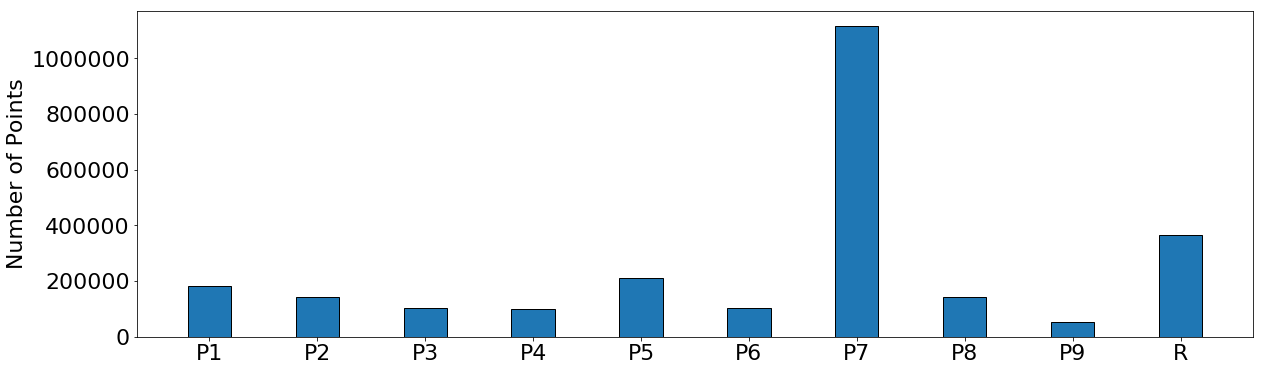

In [111]:
barplot(points_collected.num_points, 'Number of Points', 'storage/num_points')

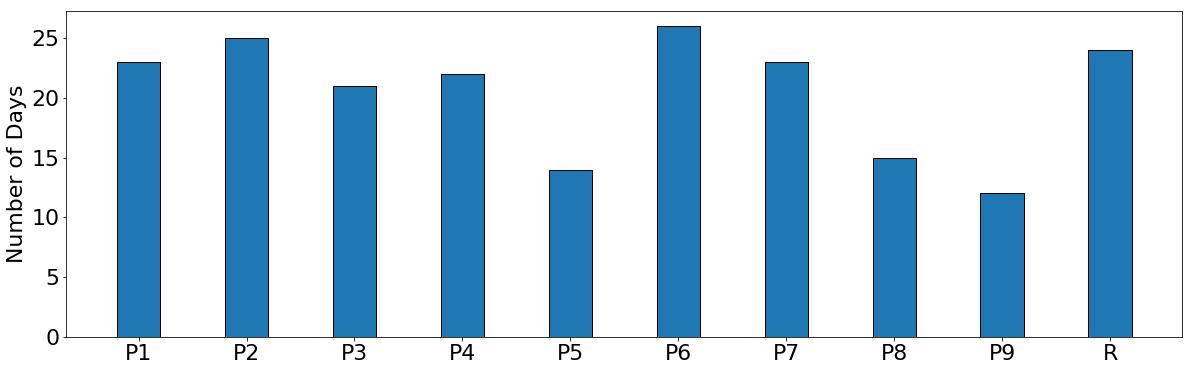

In [112]:
barplot(points_collected.num_of_days, 'Number of Days', 'storage/num_of_days')

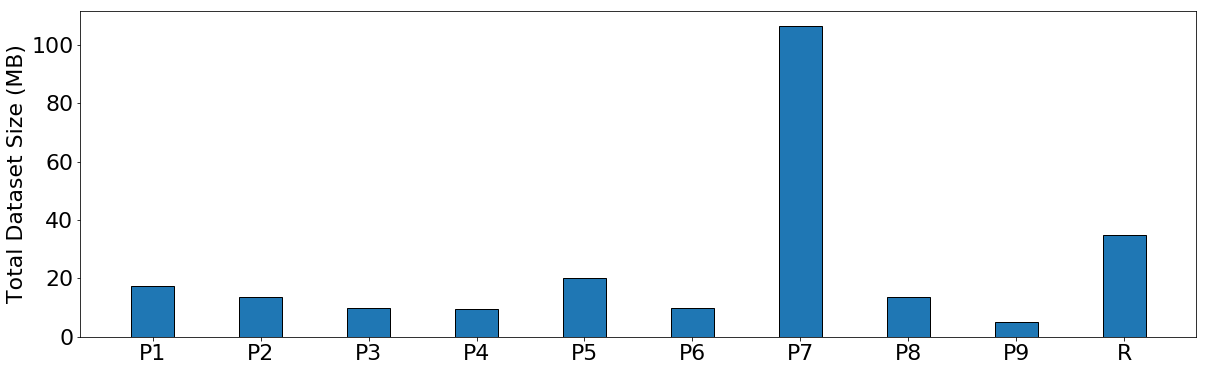

In [113]:
barplot(points_collected.size_mb, 'Total Dataset Size (MB)', 'storage/points_size_mb')

# Stops

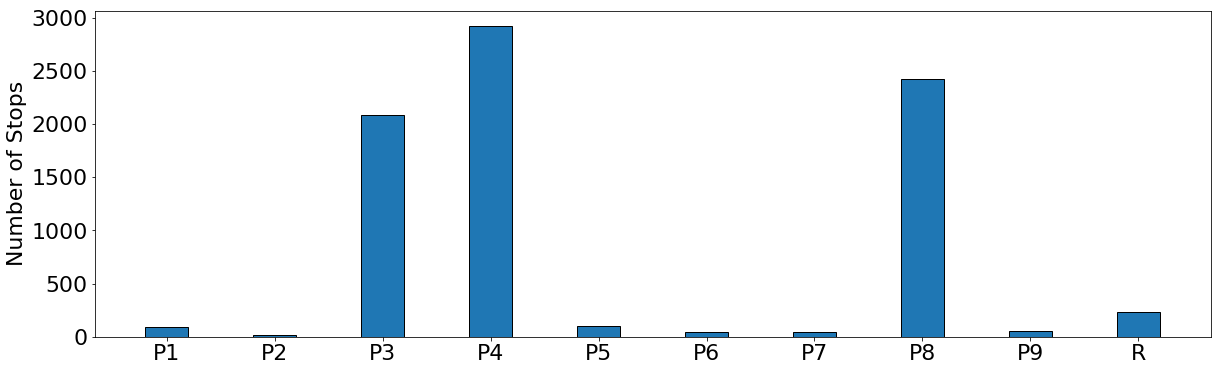

In [114]:
barplot(stops_collected.num_stops, 'Number of Stops', 'storage/num_stops')

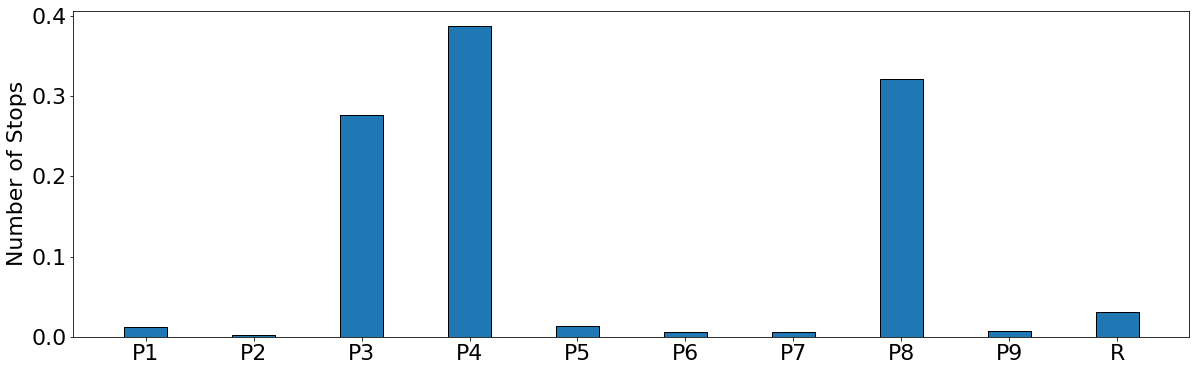

In [115]:
barplot(stops_collected.size_mb, 'Number of Stops', 'storage/stops_size_mb')

In [104]:
n_rate = points_collected.num_points / stops_collected.num_stops
n_rate

0     2013.477778
1    10931.461538
2       48.762566
3       33.842231
4     2118.010101
5     2371.953488
6    27221.341463
7       58.299629
8     1034.800000
9     1562.418803
dtype: float64

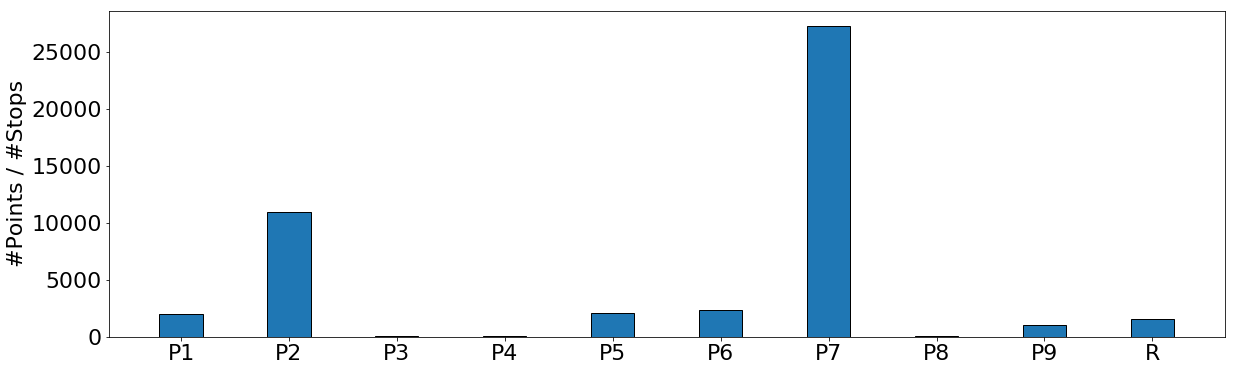

In [116]:
barplot(n_rate, '#Points / #Stops', 'storage/compression_N')

In [106]:
rate = points_collected.size_mb / stops_collected.size_mb

In [107]:
for r in rate:
    print('%.2f' % r)

1448.55
7864.36
35.08
24.35
1523.75
1706.44
19583.70
41.94
744.46
1124.04


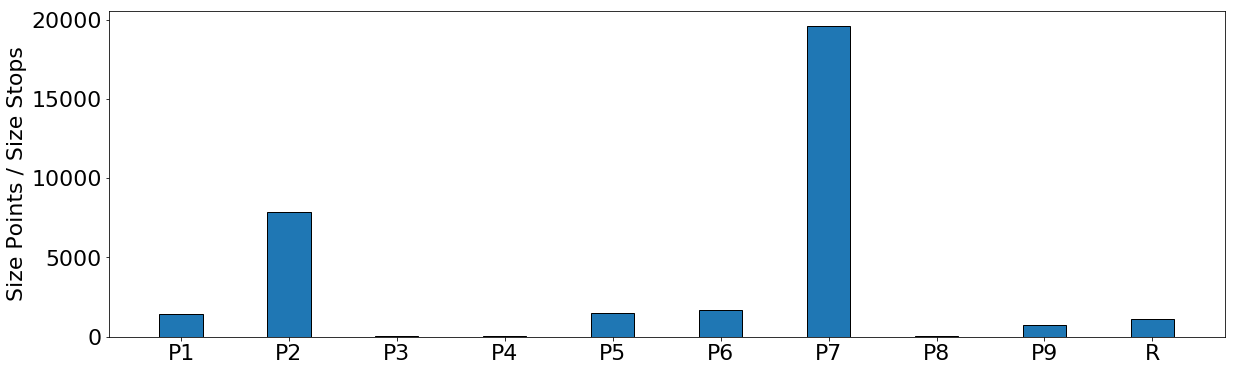

In [117]:
barplot(rate, 'Size Points / Size Stops', 'storage/compression_mb')

In [6]:
valid_days = {}

for uid in ids:
    print('%s...' % uid)
    f = get_features(uid)
    a = get_answers(uid)
    assert (len(a) == len(f))
    assert (np.all(a.date.values == f.date.values))
    
    valid_days[uid] = len(a)
print('Finished!')

1babb9e7-f88b-489a-b82a-4b67e3f58d55...


NameError: name 'get_features' is not defined

In [134]:
days_valid = list(valid_days.values())
days_total = list(points_collected.num_of_days)
days_answered = list(answers_collected.num_days_answered)

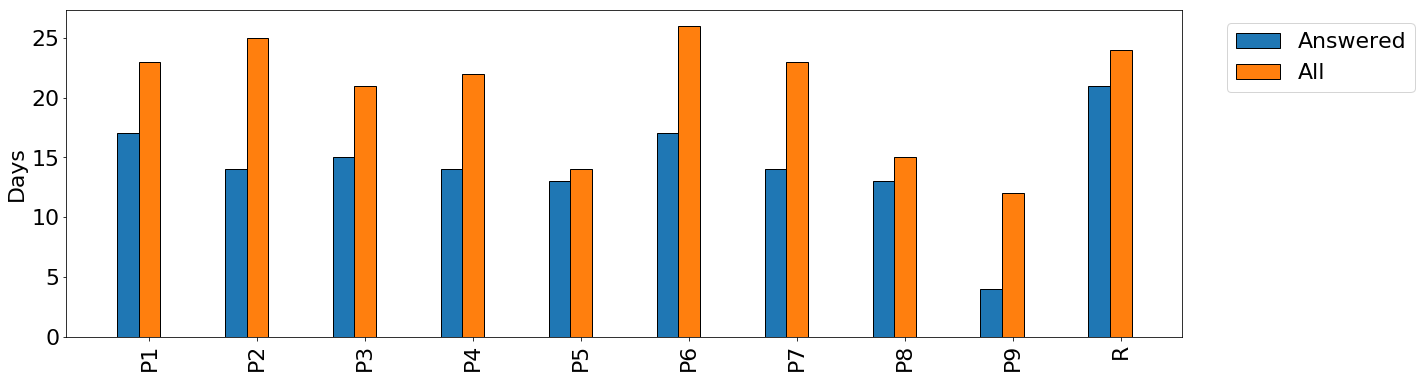

In [135]:
barplot2(days_answered, days_total, 'Answered', 'All', 'Days', 'answers_days_plot')

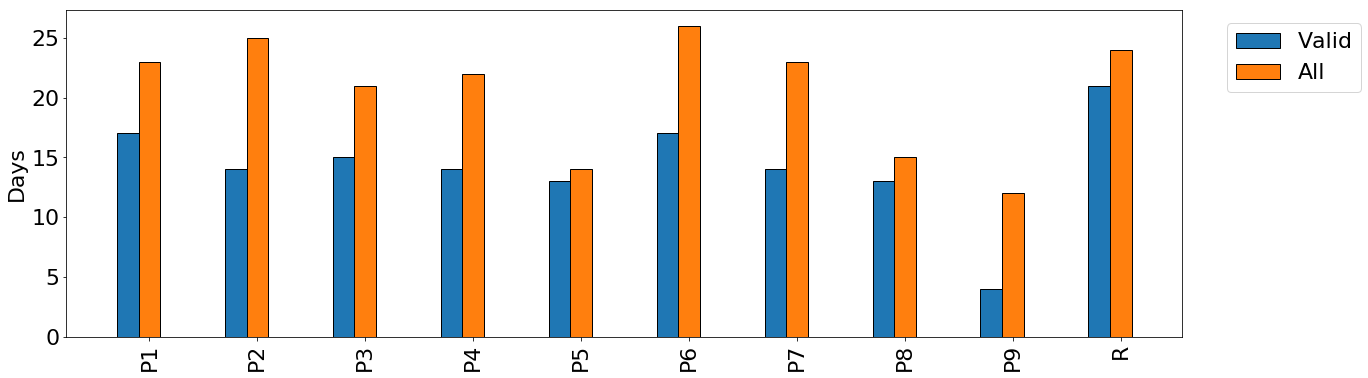

In [132]:
barplot2(days_valid, days_total, 'Valid', 'All', 'Days', 'days_plot')

In [8]:
def get_fig_path(uid):
    return '%s/%s' % (PLOT_DIR, uid)

# def make_plot_dir(uid):
#     path = get_fig_path(uid)
#     if not os.path.exists(path):
#         os.mkdir(path)

In [9]:
# Gets the timestamp of an element in a series, i.e a row in a DataFrame
def get_timestamp_hours(x): 
    # Converts to hours since epoch
    return x.timestamp() / SECONDS_PER_HOUR

In [10]:
def get_features(uid):
    f          = pd.read_csv('%s/features_%s.csv' % (DIRECTORY, uid))
    f.datetime = pd.to_datetime(f.datetime)
    f.date     = pd.to_datetime(f.date)
    return f

def get_answers(uid):
    a          = pd.read_csv('%s/answers_%s.csv' % (DIRECTORY, uid))
    a.datetime = pd.to_datetime(a.datetime)
    a.date     = pd.to_datetime(a.date)
    return a

In [11]:
def get_routine_data(uid, dates, a, f):
    # Filter out dates without a routine
    # if Routine index is -1 then no historical data exists.
    # if routine index is 
    valid = (f.routine_overlap_today > -1) & (f.number_of_places_today > 0)
    valid_dates = dates[valid]

    # Get the computed routine overlap
    feature = f.routine_overlap_today.values[valid]

    # The answer is from 0-5, i.e. by diving by 5 we end up with a scale of 0-1
    answer = a.routine_scale.values[valid] / 5
    
    return answer, feature, valid_dates

In [12]:
def get_homestay_data(uid, dates, a, f):
    # Find dates for which the home stay was actually calculated
    valid = (f.home_stay_today >= 0).values
    valid_dates = dates[valid] 

    # Calculate elapsed time, i.e. time since midnight
    elapsed = f.datetime.apply(get_timestamp_hours) - f.date.apply(get_timestamp_hours)

    # Calculate home stay by using time away from home, from answers
    answer = (elapsed - a.home) / elapsed
    answer = answer[valid].values

    # The computed home stay
    feature = f.home_stay_today[valid].values
    
    valid = answer >= 0.0
    valid_dates = valid_dates[valid]
    
    answer = answer[valid]
    feature = feature[valid]
    
    return answer, feature, valid_dates

In [13]:
def get_places_data(uid, dates, a, f):
    # Filter out dates without any places, they contain too little data
    valid = (f.number_of_places_today > 0).values
    valid_dates = dates[valid]
    answer = a.places.values[valid]
    feature = f.number_of_places_today.values[valid]
    
    return answer, feature, valid_dates

In [14]:
def plot_places_barplot(uid, dates, a, f):
    answer, feature, valid_dates = get_places_data(uid, dates, a, f)
    y_label = 'Number of Places'
    make_barplot(answer, feature, valid_dates, y_label, 'places')
    
def plot_homestay_barplot(uid, dates, a, f):
    answer, feature, valid_dates = get_homestay_data(uid, dates, a, f)
    y_label = 'Home Stay %'
    make_barplot(answer * 100, feature * 100, valid_dates, y_label, 'homestay')
    
def plot_routine_barplot(uid, dates, a, f):
    answer, feature, valid_dates = get_routine_data(uid, dates, a, f)
    y_label = 'Routine Index %'
    make_barplot(answer * 100, feature * 100, valid_dates, y_label, 'routine')

# Load

In [129]:
uid = 'd91a3af6-1a81-48a4-a8c2-1eb6022401b6'
f = get_features(uid)
a = get_answers(uid)

assert (len(a) == len(f))
assert (np.all(a.date.values == f.date.values))
dates = a.date

In [137]:
help(get_homestay_data)

Help on function get_homestay_data in module __main__:

get_homestay_data(uid, dates, a, f)



In [15]:
valid_homestay = {}
valid_places = {}
valid_routine = {}

days_valid_total = {}

for uid in ids:
    print('%s...' % uid)
    f = get_features(uid)
    a = get_answers(uid)
    assert (len(a) == len(f))
    assert (np.all(a.date.values == f.date.values))
    
    dates = a.date
    
    days_valid_total[uid] = len(dates)
    valid_homestay[uid] = len(get_homestay_data(uid, dates, a, f)[2])
    valid_places[uid] = len(get_places_data(uid, dates, a, f)[2])
    valid_routine[uid] = len(get_routine_data(uid, dates, a, f)[2])
print('Finished!')

1babb9e7-f88b-489a-b82a-4b67e3f58d55...
1be9abef-6967-492a-9b83-46cb08493357...
284a0170-caed-4c29-bfac-757409b9d248...
5ba5e566-409a-4664-a9fa-f27c08422578...
d6962ede-e622-475e-959a-5405af68414b...
d91a3af6-1a81-48a4-a8c2-1eb6022401b6...
dfe18eb9-791b-440d-8e55-61b6886904b2...
ec110976-0192-436d-b451-4f5dd97e71d8...
21e6abea-ebbc-453b-8cff-15064e32db06...
d6b2d9b9-398b-4e0d-b52b-224747f515c8...
Finished!


In [156]:
valid_total_days = list(days_valid_total.values())
homestay_valid = list(valid_homestay.values())
places_valid = list(valid_places.values())
routine_valid = list(valid_routine.values())

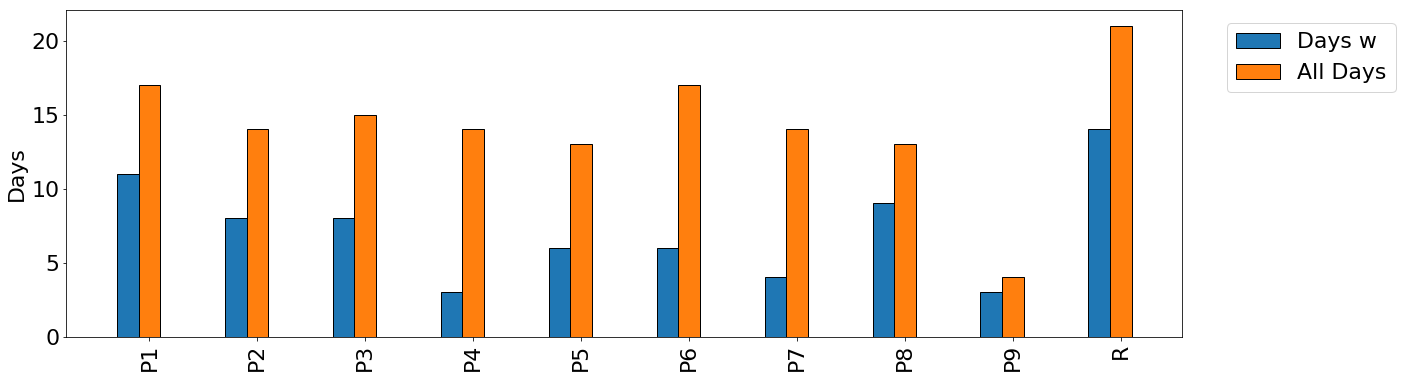

In [157]:
barplot2(homestay_valid, valid_total_days, 'Days w', 'All Days', 'Days', 'answers_days_plot')

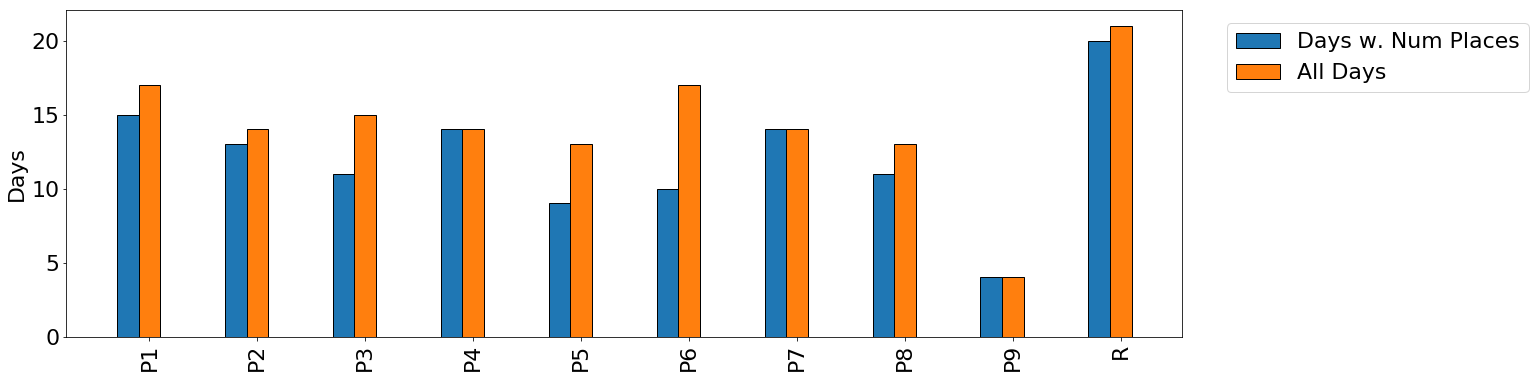

In [158]:
barplot2(places_valid, valid_total_days, 'Days w. Num Places', 'All Days', 'Days', 'numplaces_valid_days')

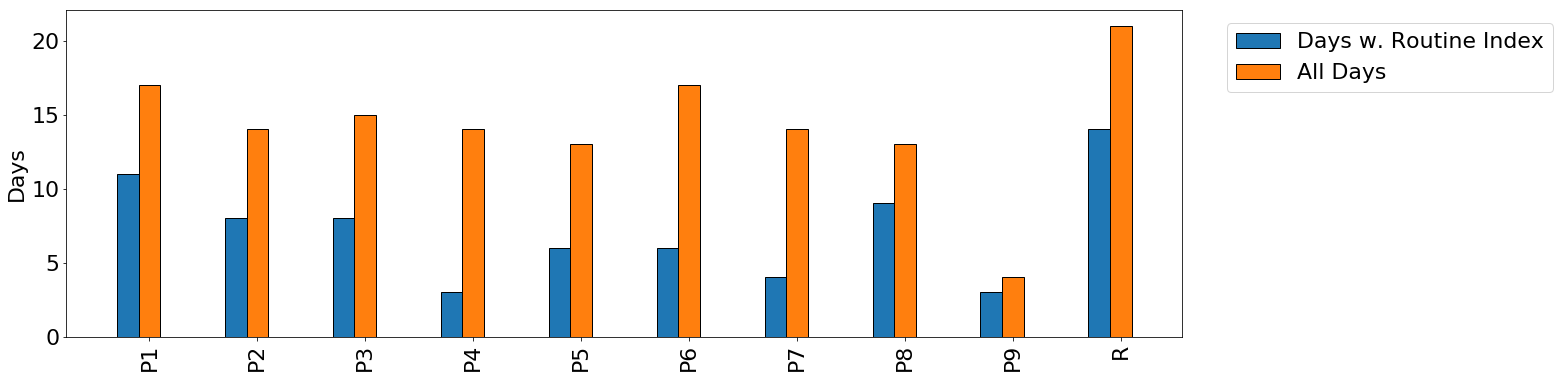

In [159]:
barplot2(homestay_valid, valid_total_days, 'Days w. Routine Index', 'All Days', 'Days', 'routine_valid_days')

# Features

## Number of places

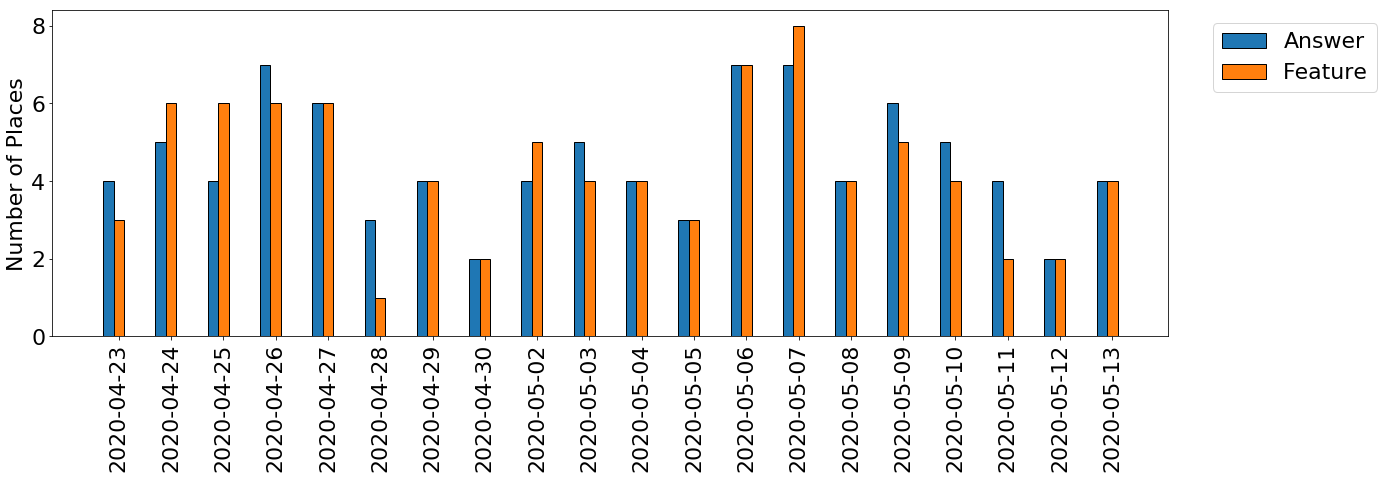

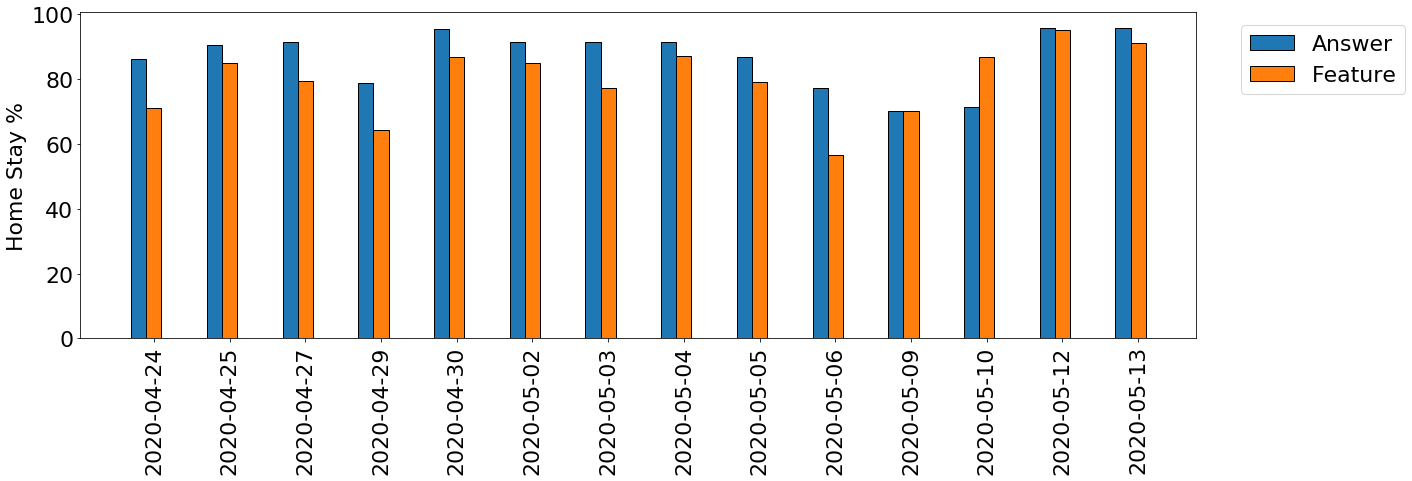

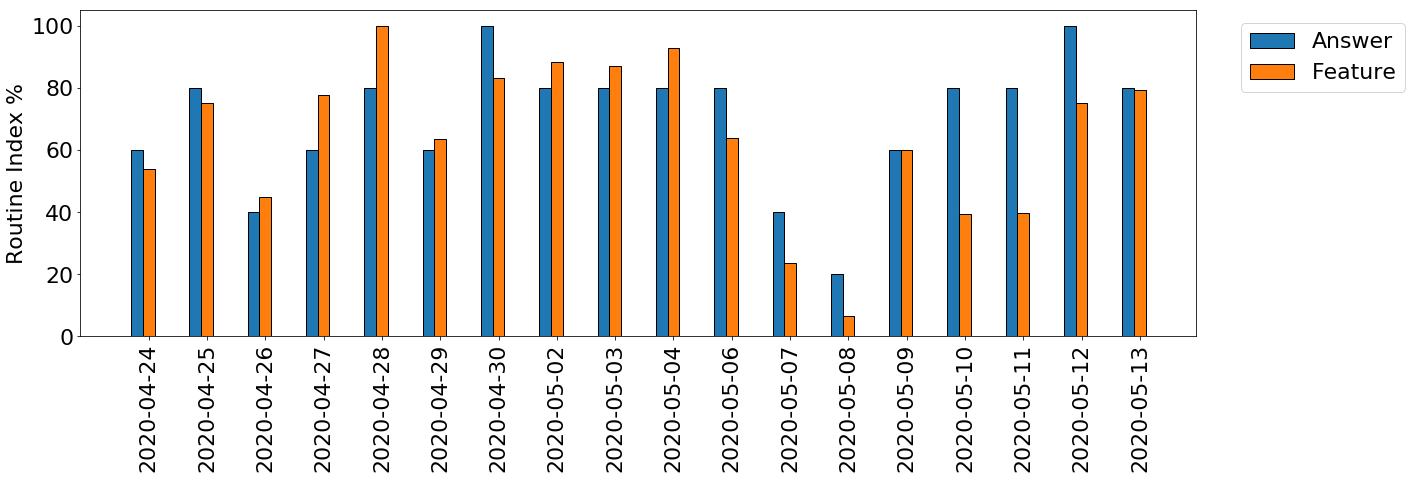

In [49]:
SAVE_FIG = True

plot_places_barplot(uid, dates, a, f)

plot_homestay_barplot(uid, dates, a, f)

plot_routine_barplot(uid, dates, a, f)

# produce all plots

1babb9e7-f88b-489a-b82a-4b67e3f58d55...
1be9abef-6967-492a-9b83-46cb08493357...
284a0170-caed-4c29-bfac-757409b9d248...
5ba5e566-409a-4664-a9fa-f27c08422578...
d6962ede-e622-475e-959a-5405af68414b...
d91a3af6-1a81-48a4-a8c2-1eb6022401b6...
dfe18eb9-791b-440d-8e55-61b6886904b2...


/Users/tnni/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


ec110976-0192-436d-b451-4f5dd97e71d8...
21e6abea-ebbc-453b-8cff-15064e32db06...
d6b2d9b9-398b-4e0d-b52b-224747f515c8...
Finished!


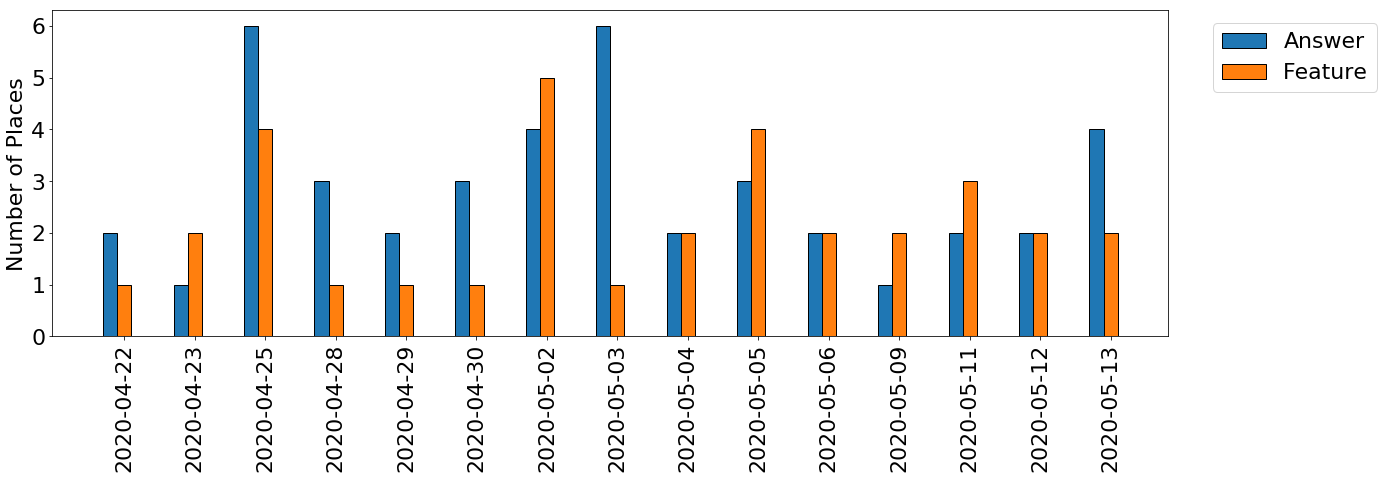

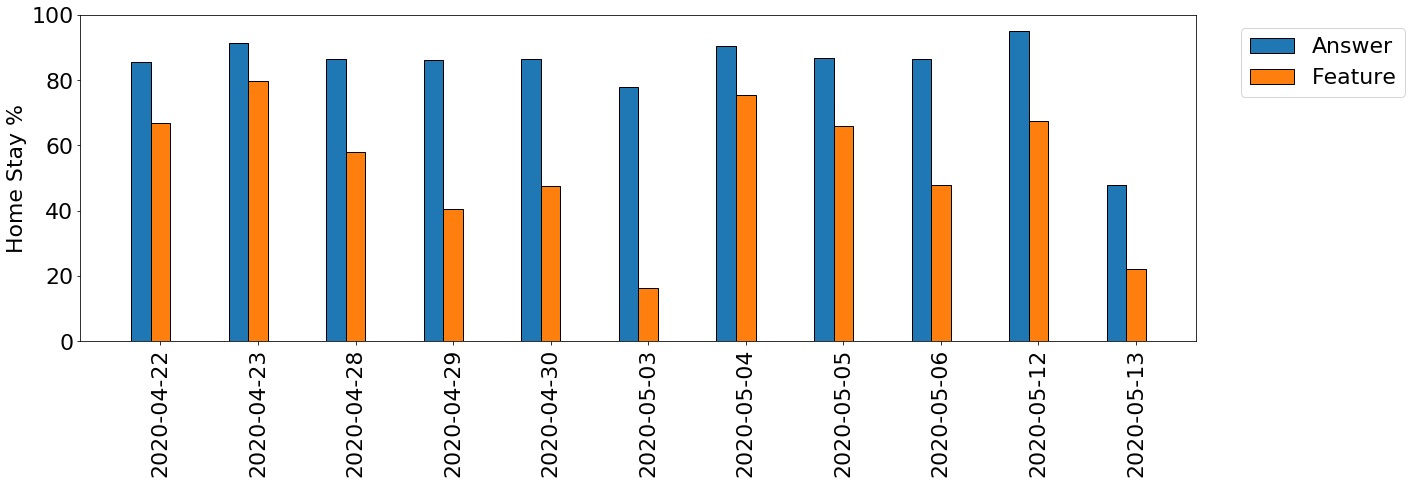

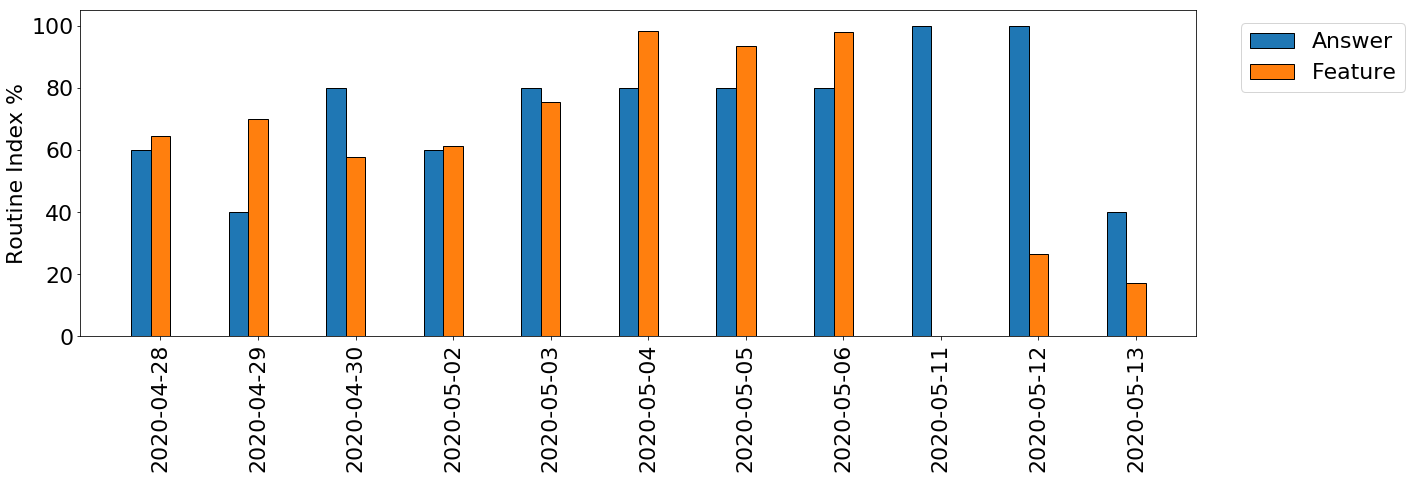

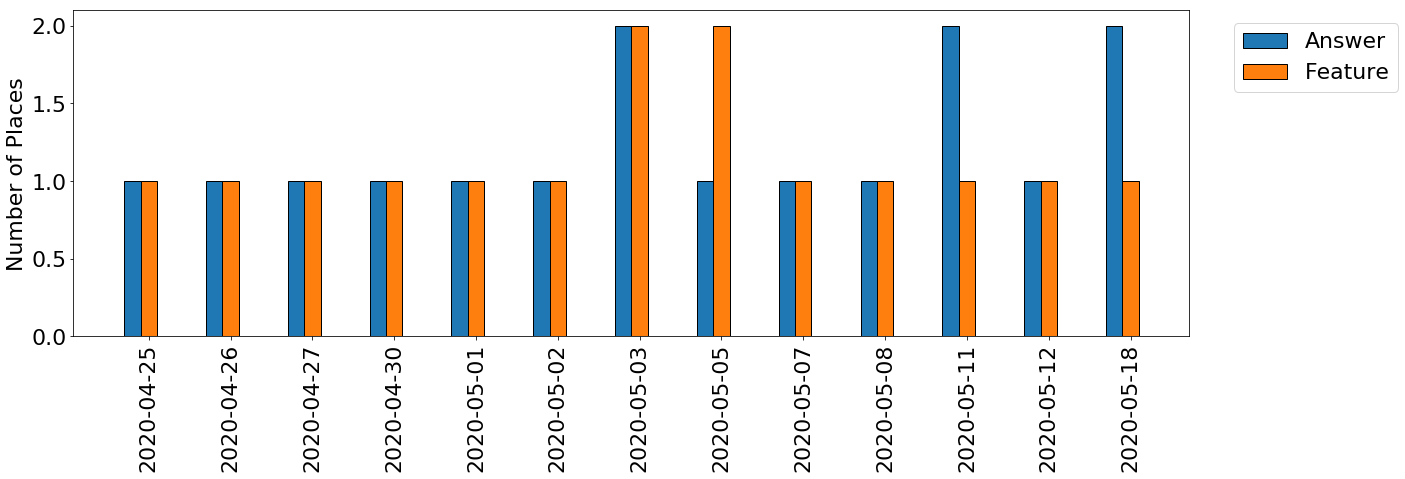

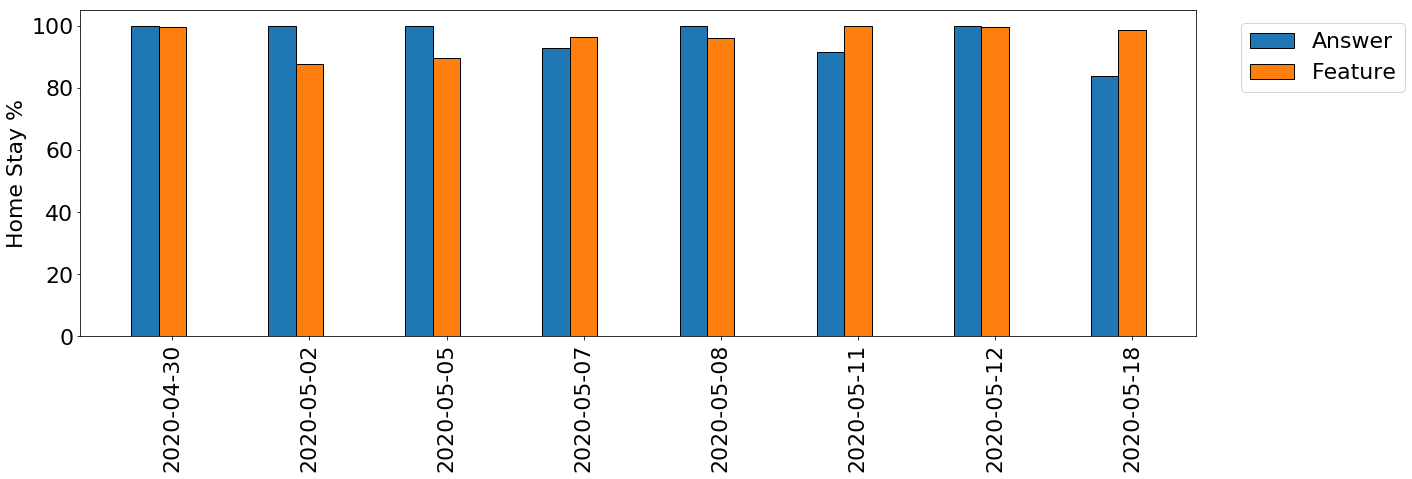

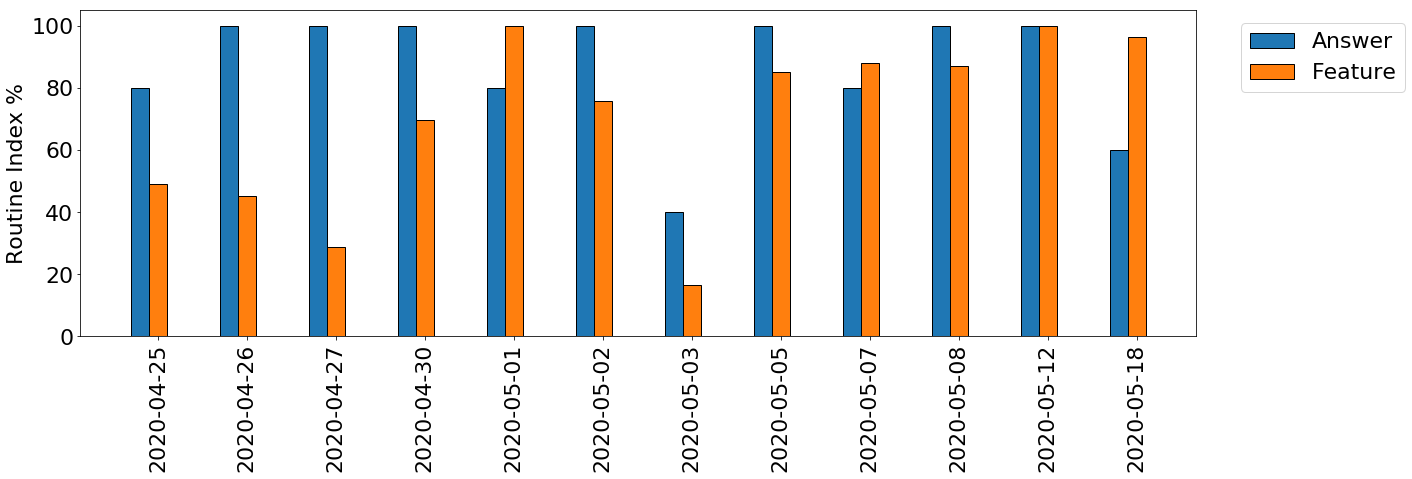

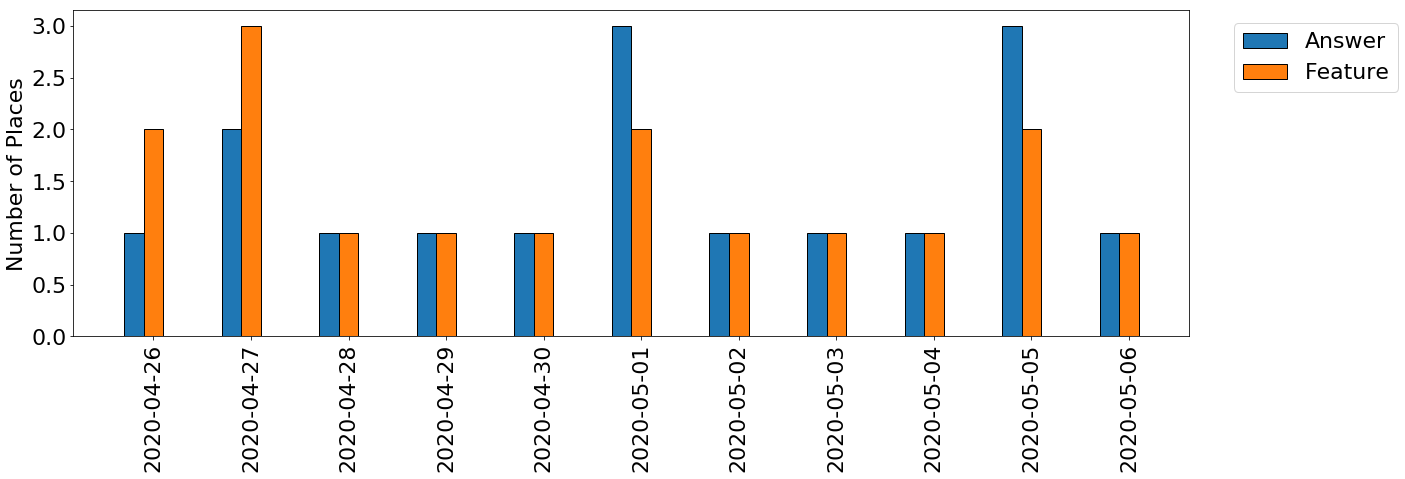

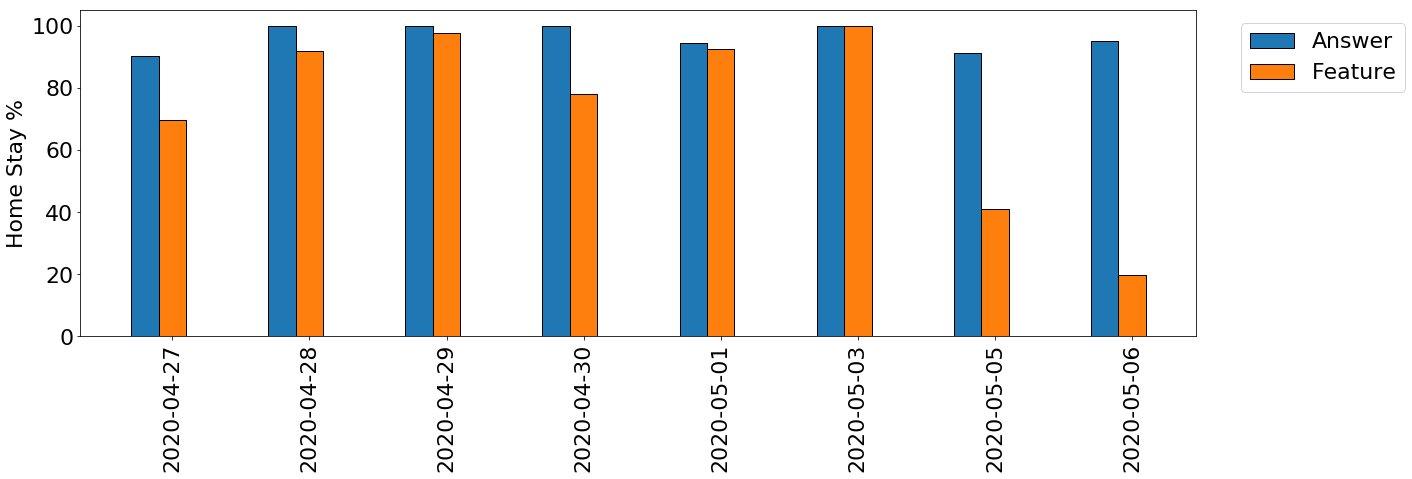

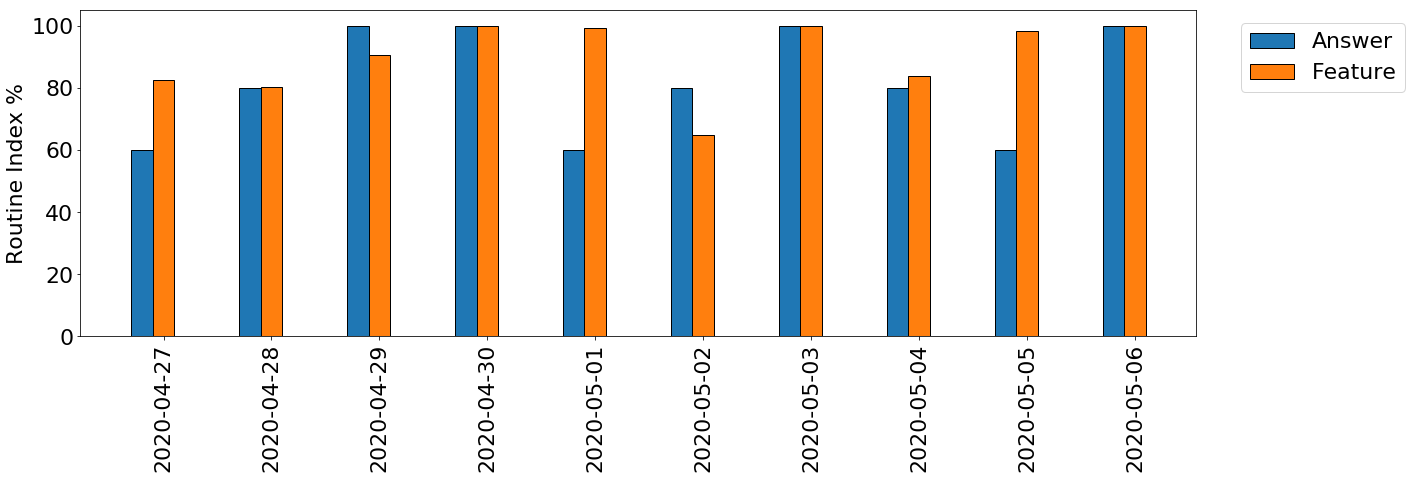

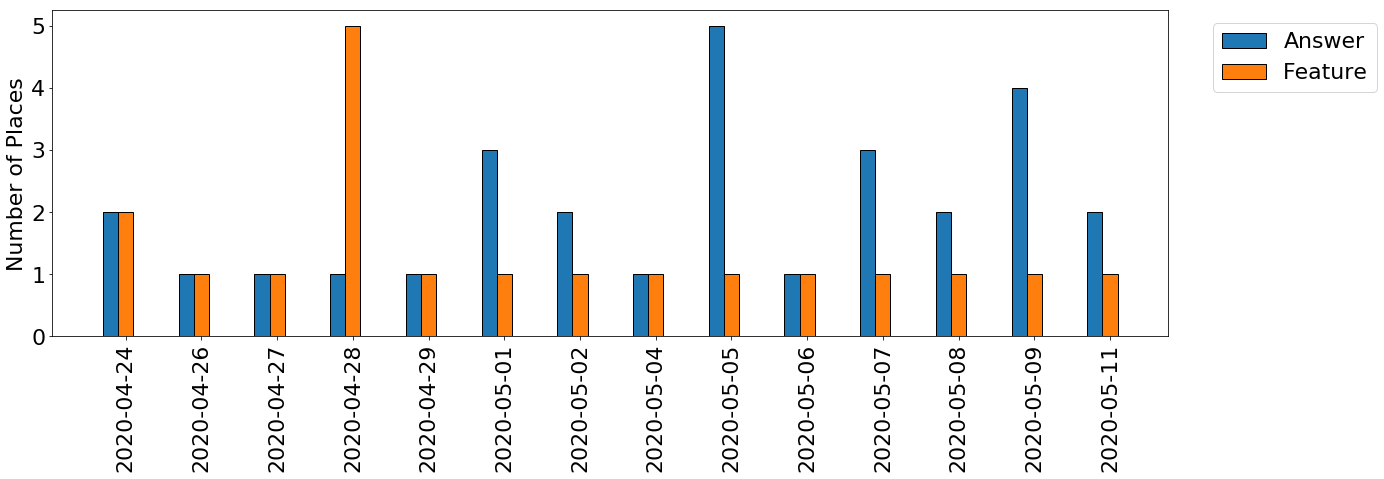

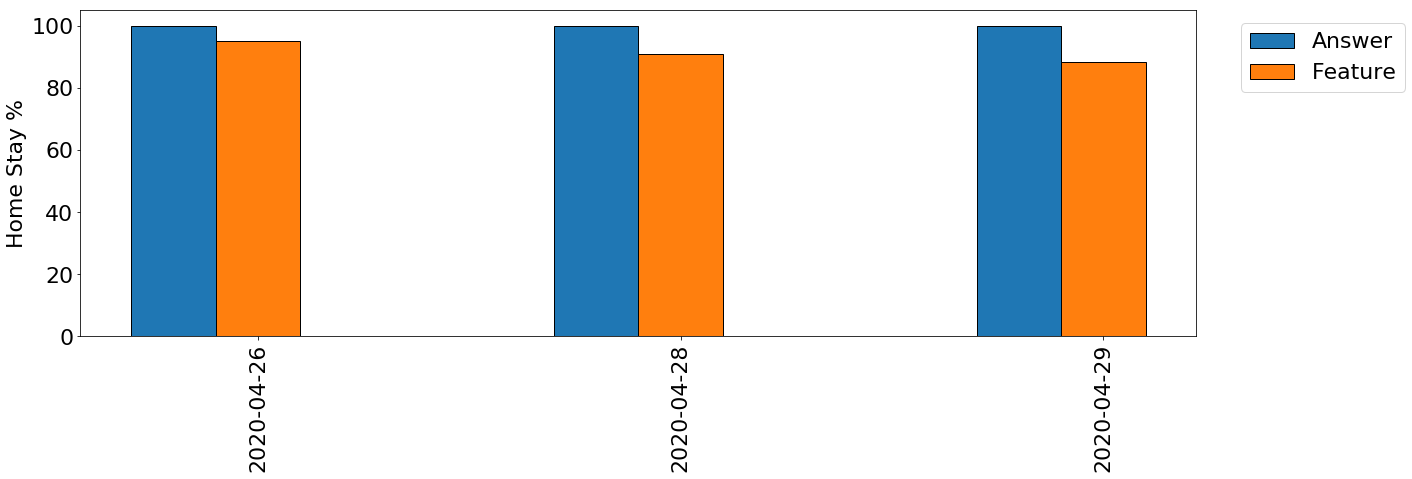

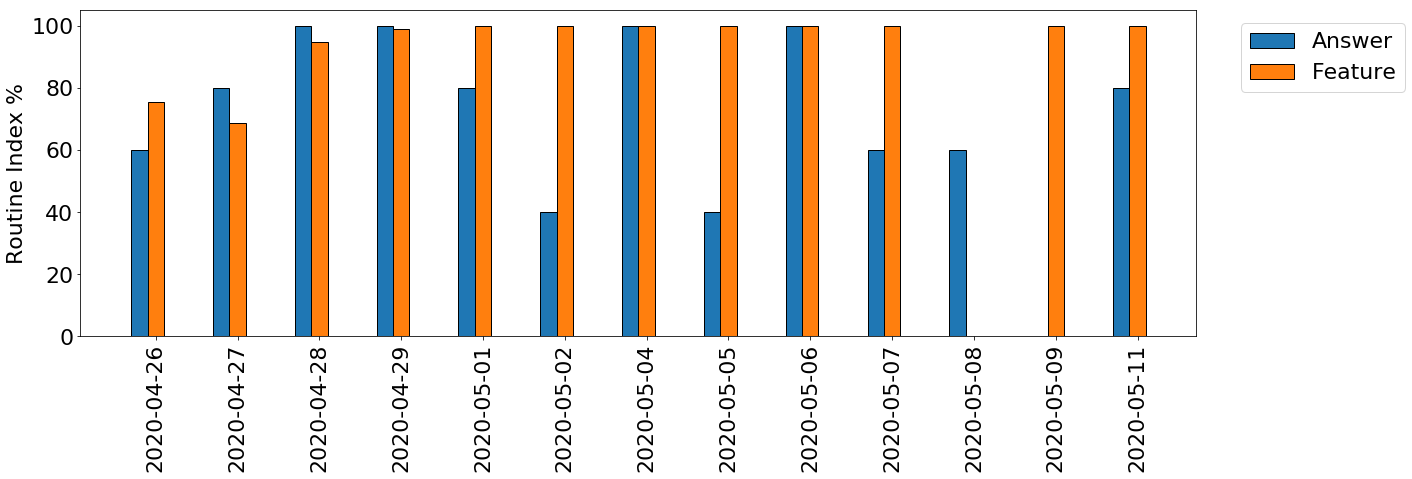

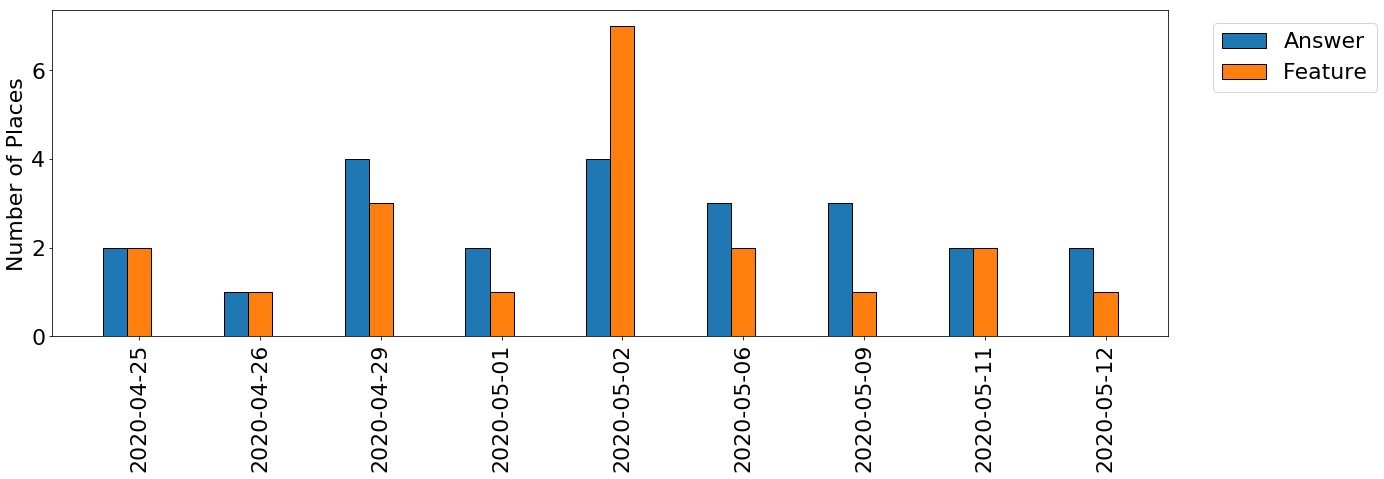

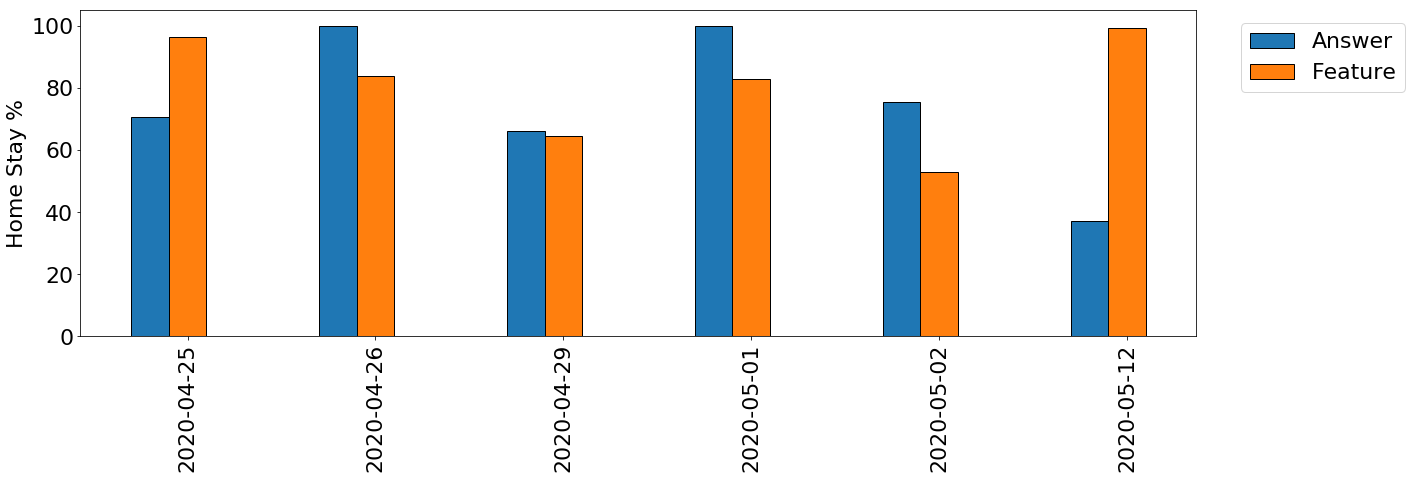

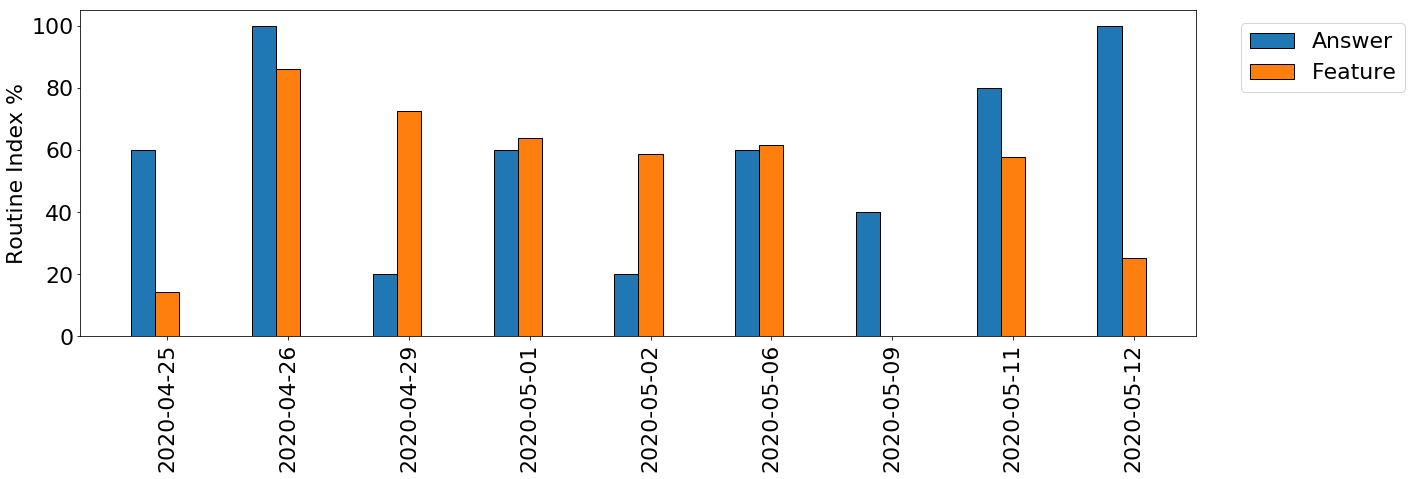

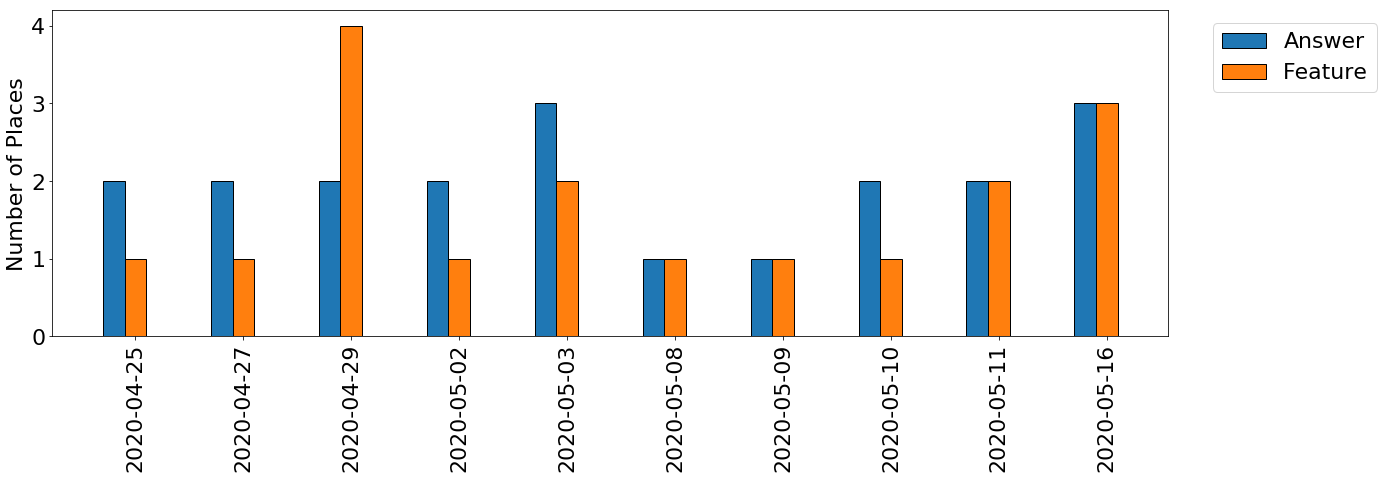

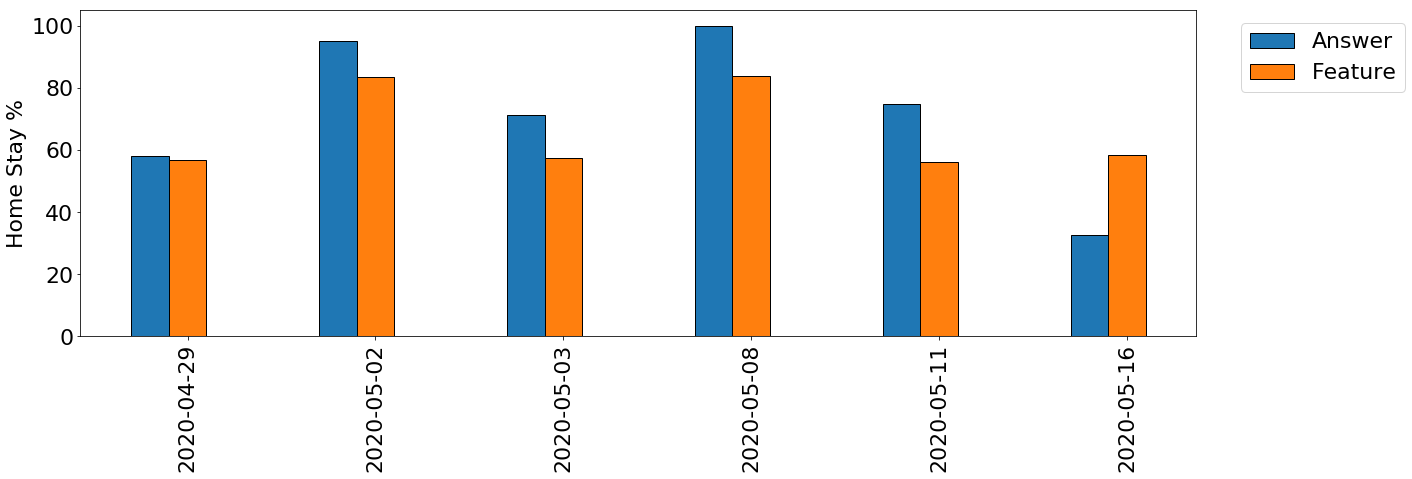

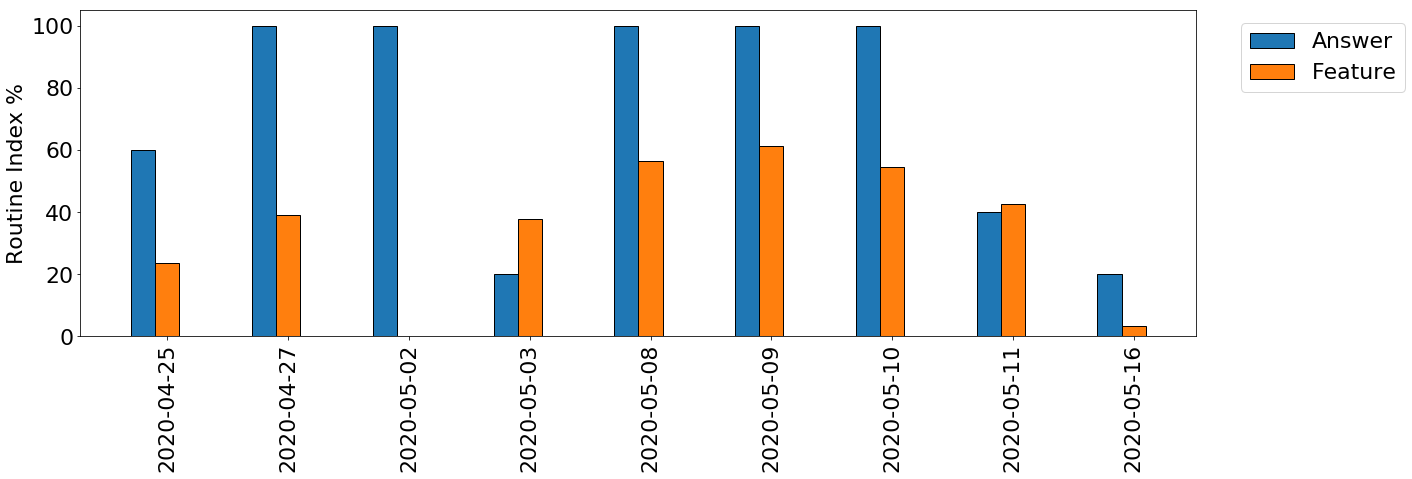

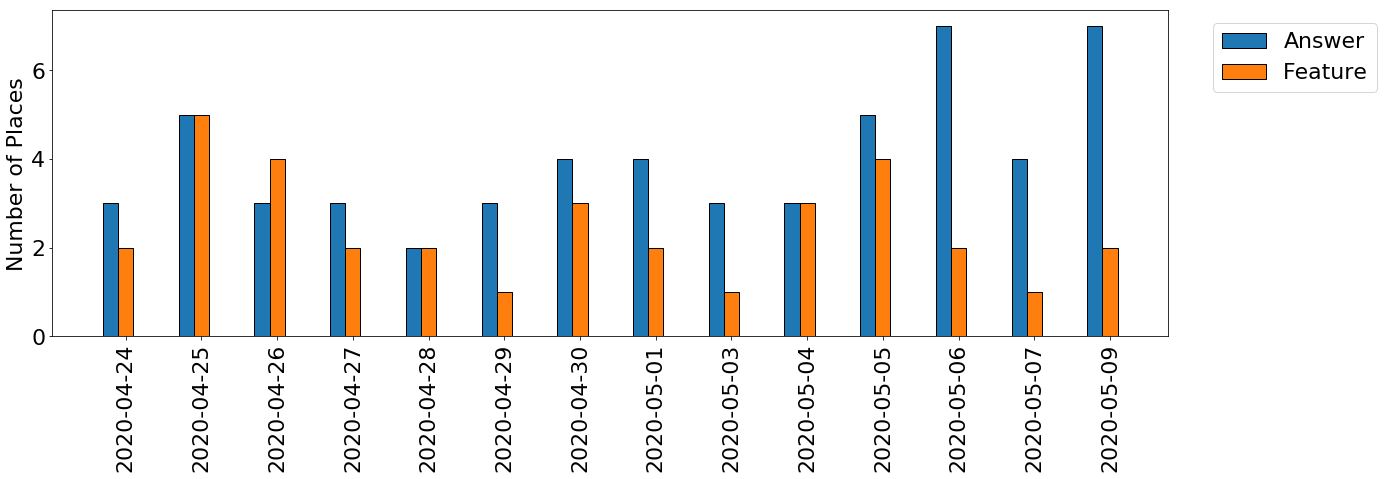

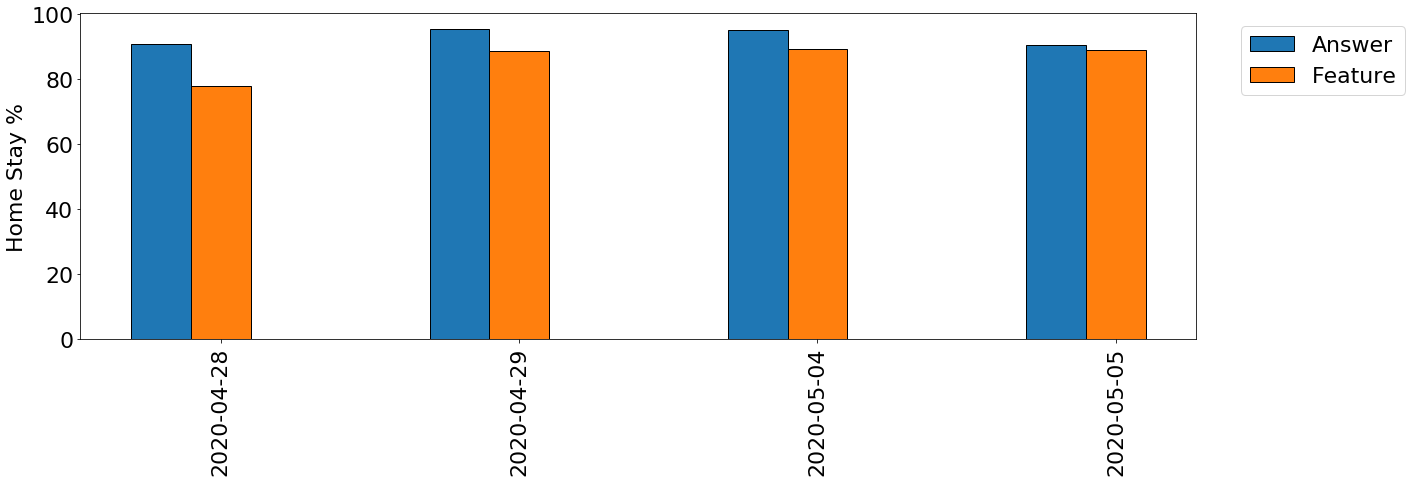

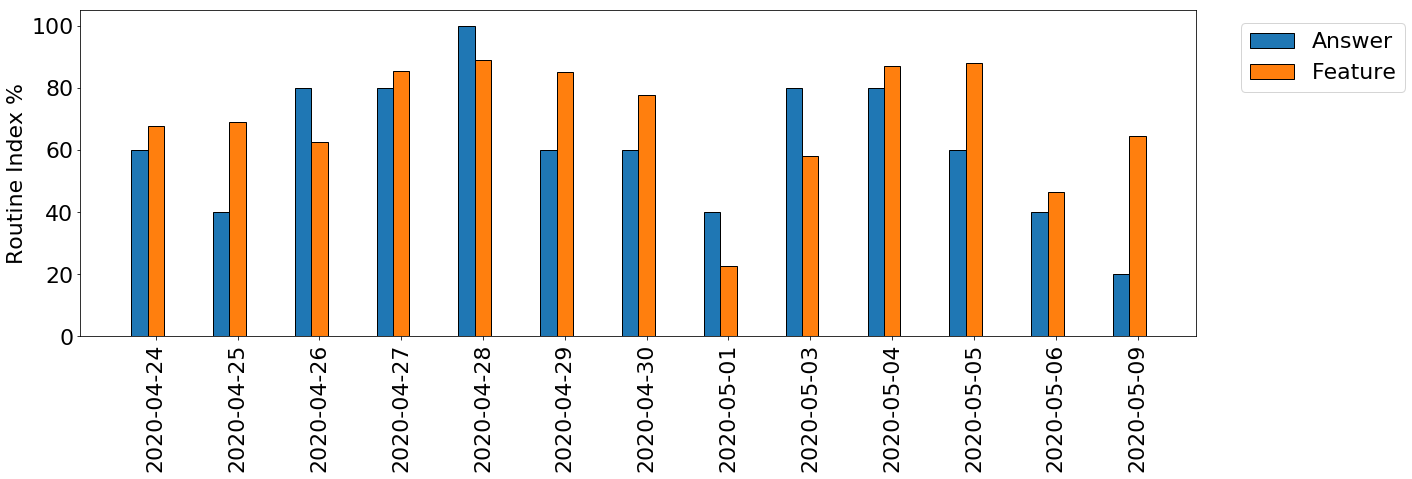

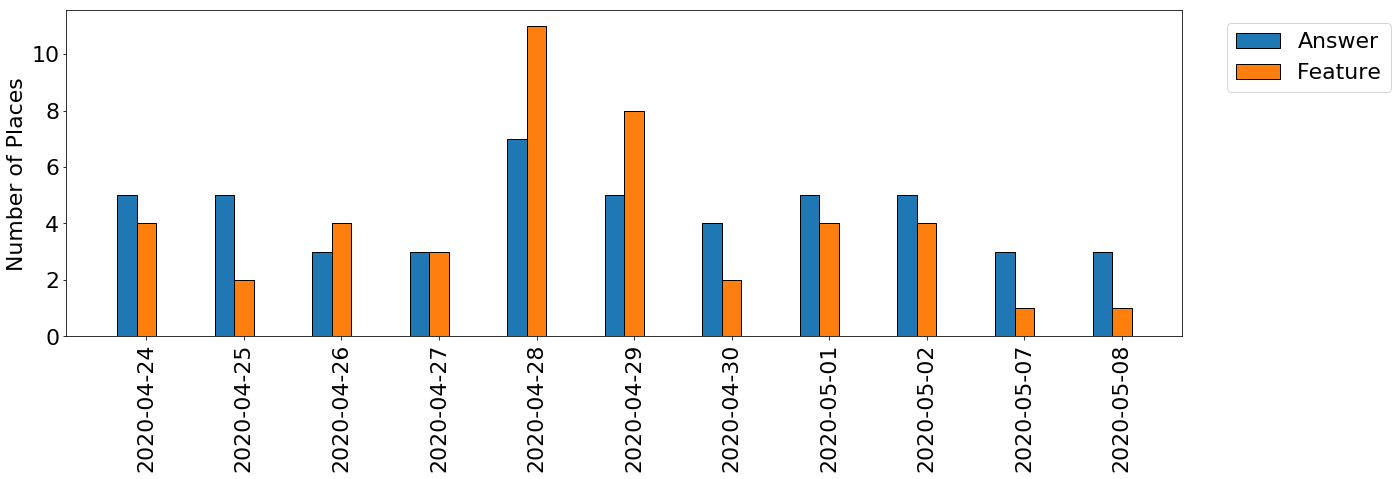

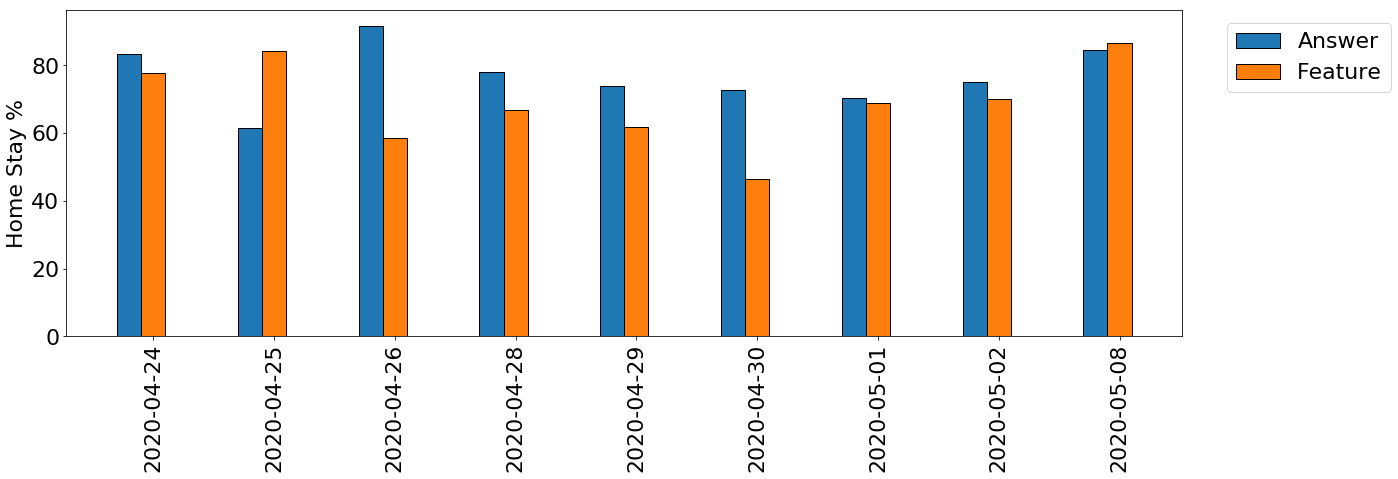

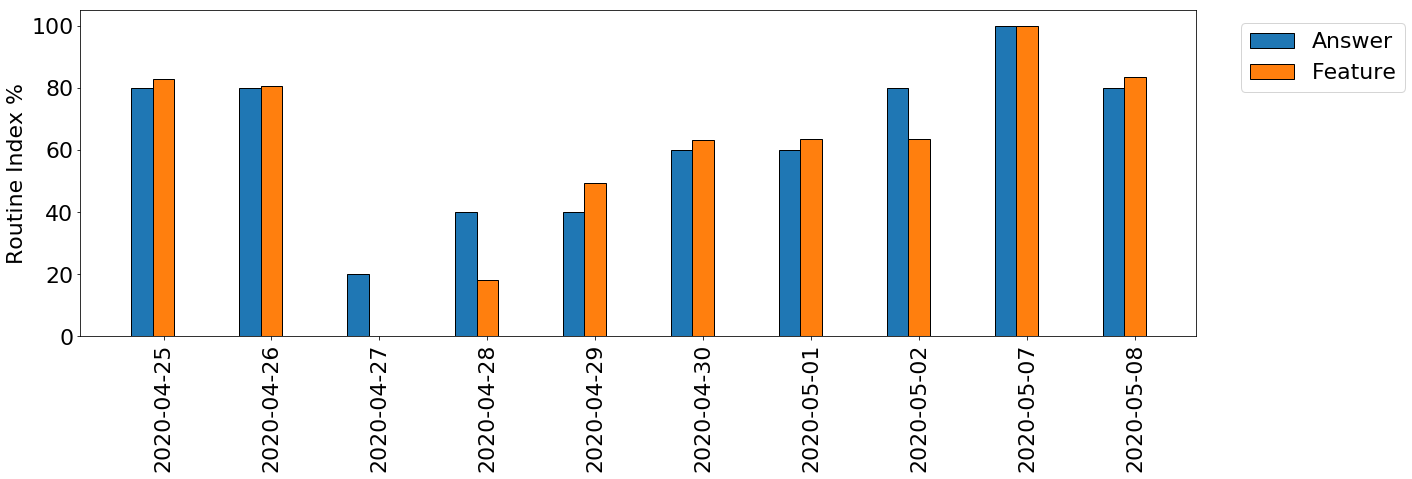

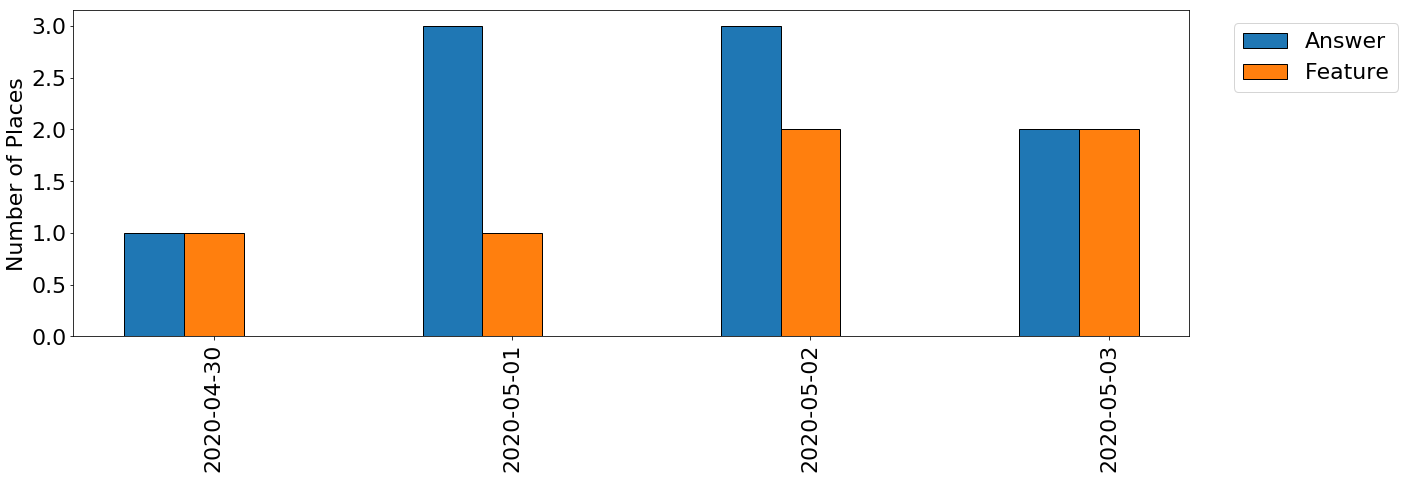

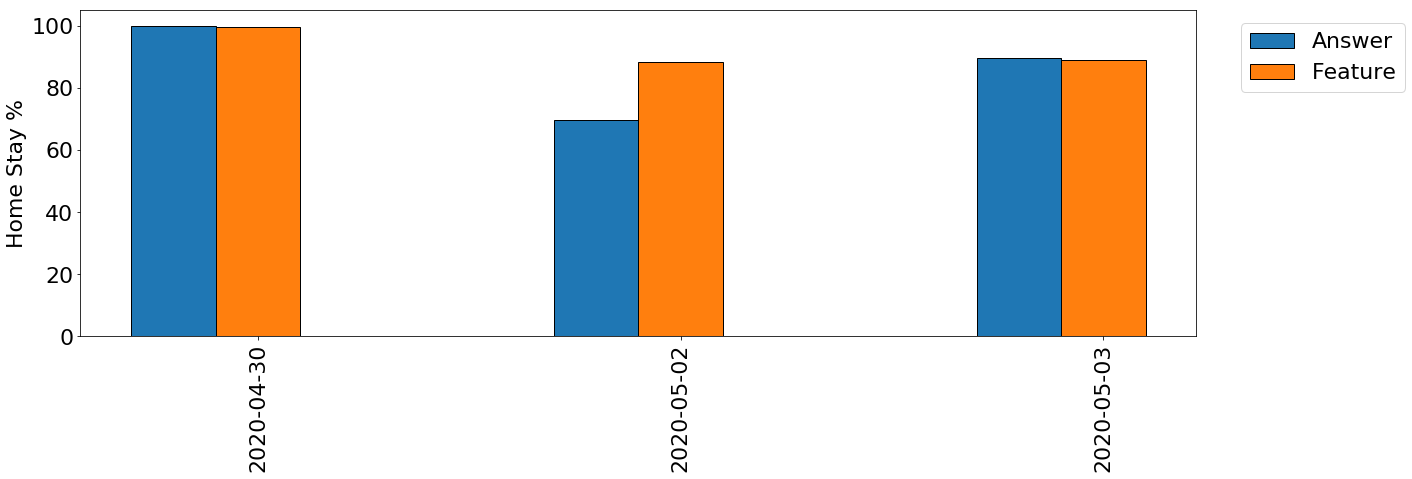

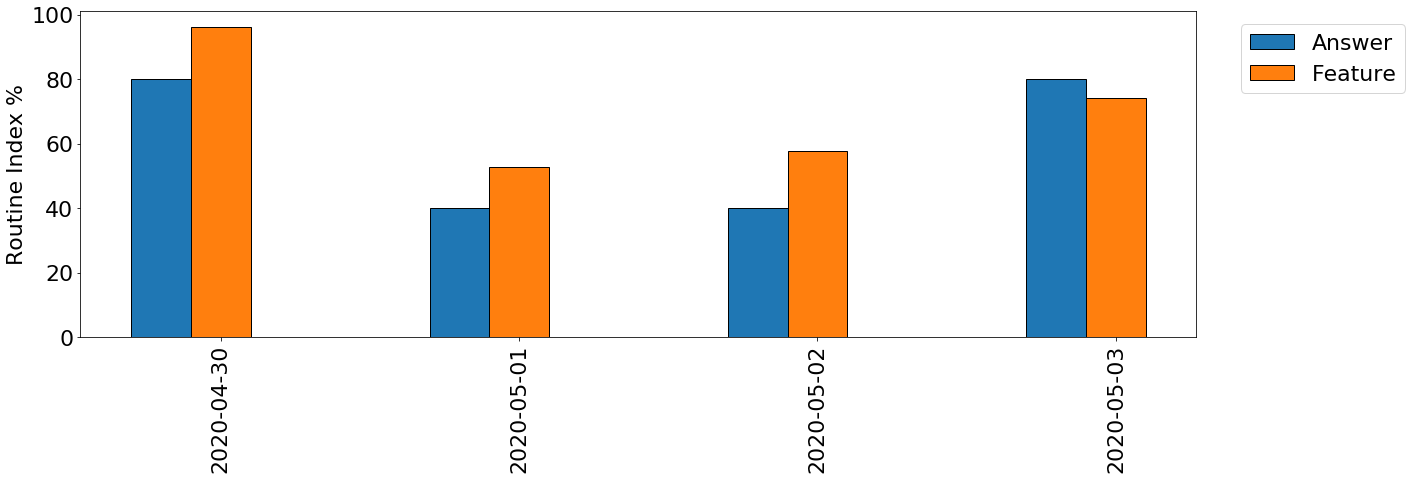

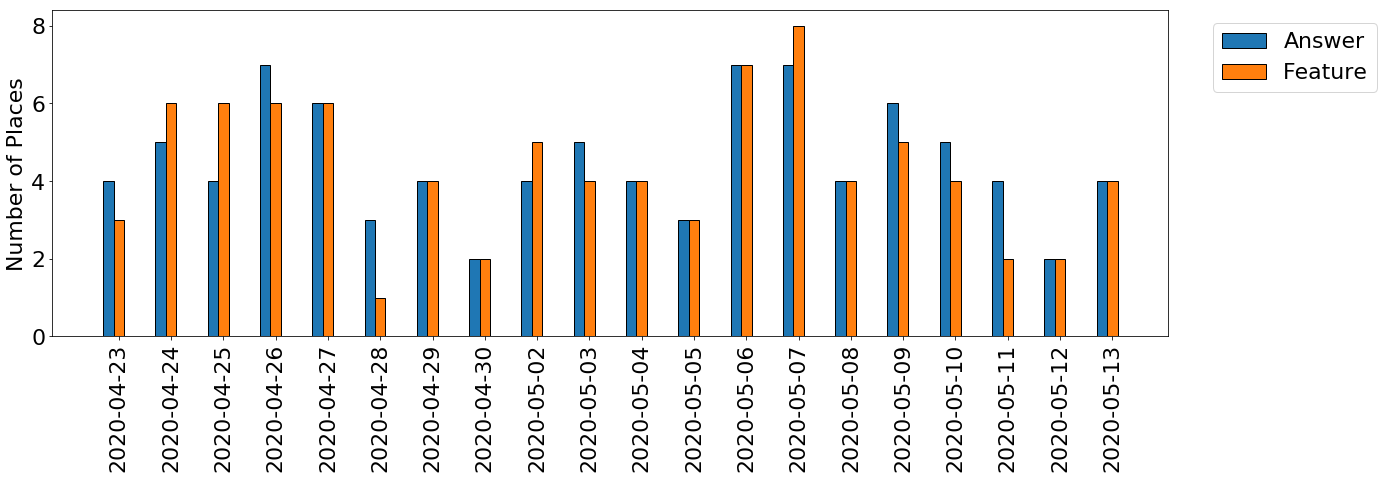

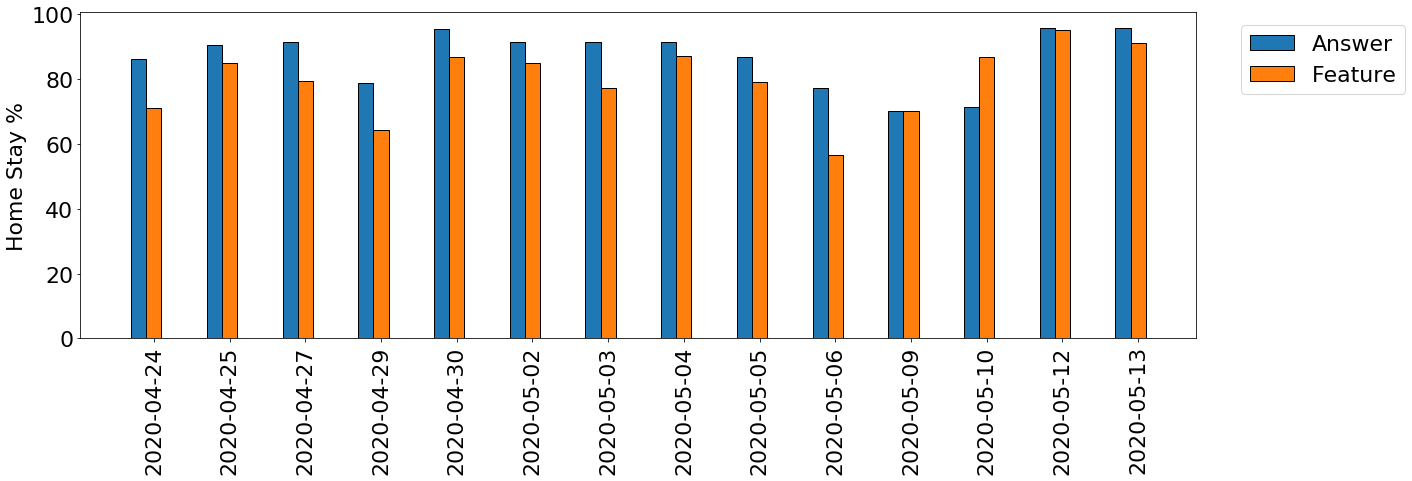

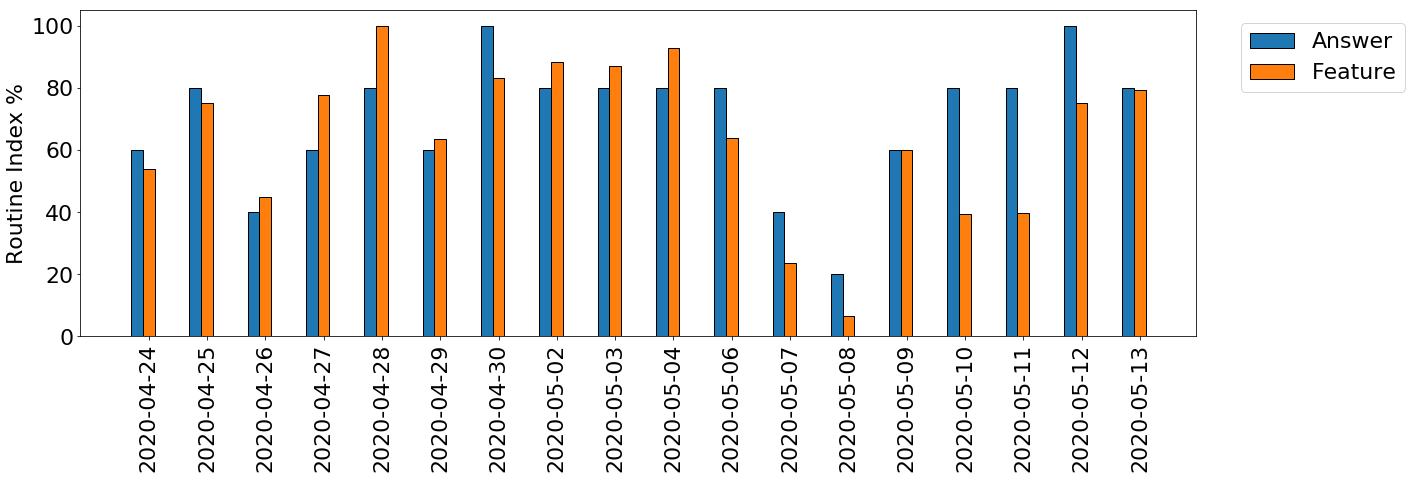

In [44]:
for uid in ids:
    print('%s...' % uid)
    f = get_features(uid)
    a = get_answers(uid)
    assert (len(a) == len(f))
    assert (np.all(a.date.values == f.date.values))
    
    dates = a.date
    
    plot_places_barplot(uid, dates, a, f)
    plot_homestay_barplot(uid, dates, a, f)
    plot_routine_barplot(uid, dates, a, f)
print('Finished!')

# Aggregate RMSE plot

In [62]:
def rmse_barplot(rmse_array, y_label, plot_name):
    labels = ['P%i' % (i+1) for i in range(len(ids))]
    labels[-1] = 'R' # set last label to be the researcher label

    # set width of bar
    barWidth = 0.5

    bars = rmse_array
    r = np.arange(len(bars))

    # Make the plot
    plt.figure(figsize=[12,4])
    plt.bar(r, bars, width=barWidth, edgecolor='black')
    plt.axhline(y=0,linewidth=1, color='k')

    # Add xticks on the middle of the group bars
    plt.xticks(r, labels)
    plt.ylabel(y_label)
    
    if SAVE_FIG:
        img_name = PLOT_DIR + '/' + plot_name
        plt.savefig(img_name, dpi=300,  bbox_inches = "tight")
    plt.show()

In [17]:
n_places   = []
n_homestay = []
n_routine  = []

for uid in ids:
    print('%s...' % uid)
    f = get_features(uid)
    a = get_answers(uid)
    assert (len(a) == len(f))
    assert (np.all(a.date.values == f.date.values))
    
    dates = a.date
    
    ans, feat, dat = get_places_data(uid, dates, a, f)
    n_places.append(len(dat))
    
    ans, feat, dat = get_homestay_data(uid, dates, a, f)
    n_homestay.append(len(dat))
    
    ans, feat, dat = get_routine_data(uid, dates, a, f)
    n_routine.append(len(dat))  

1babb9e7-f88b-489a-b82a-4b67e3f58d55...
1be9abef-6967-492a-9b83-46cb08493357...
284a0170-caed-4c29-bfac-757409b9d248...
5ba5e566-409a-4664-a9fa-f27c08422578...
d6962ede-e622-475e-959a-5405af68414b...
d91a3af6-1a81-48a4-a8c2-1eb6022401b6...
dfe18eb9-791b-440d-8e55-61b6886904b2...
ec110976-0192-436d-b451-4f5dd97e71d8...
21e6abea-ebbc-453b-8cff-15064e32db06...
d6b2d9b9-398b-4e0d-b52b-224747f515c8...


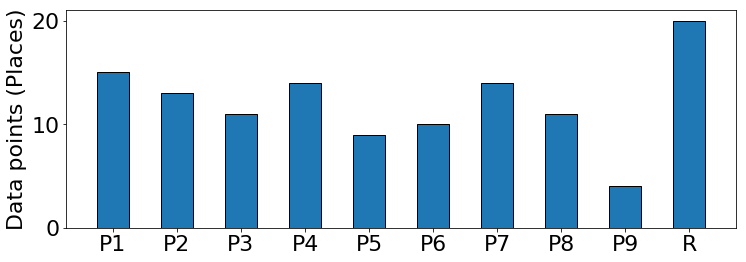

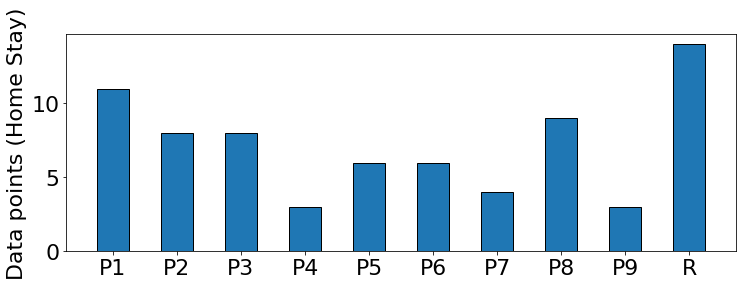

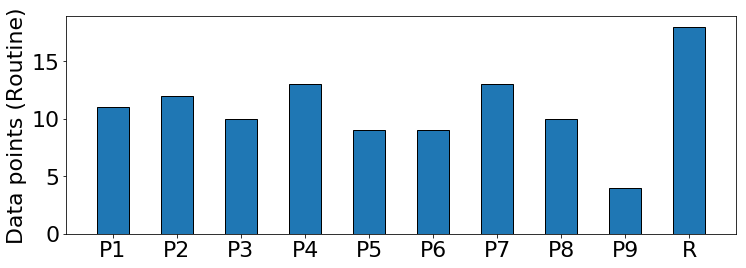

In [34]:
SAVE_FIG = True
rmse_barplot(n_places,   'Data points (Places)',      'n_places')
rmse_barplot(n_homestay, 'Data points (Home Stay)', 'n_homestay')
rmse_barplot(n_routine,  'Data points (Routine)',   'n_routine')

In [30]:
rmse_places   = []
rmse_homestay = []
rmse_routine  = []

for uid in ids:
    print('%s...' % uid)
    f = get_features(uid)
    a = get_answers(uid)
    assert (len(a) == len(f))
    assert (np.all(a.date.values == f.date.values))
    
    dates = a.date
    
    ans, feat, dat = get_places_data(uid, dates, a, f)
    rmse_places.append(np.abs(ans - feat).mean())
    
    ans, feat, dat = get_homestay_data(uid, dates, a, f)
    rmse_homestay.append(100 * np.abs(ans - feat).mean())
    
    ans, feat, dat = get_routine_data(uid, dates, a, f)
    rmse_routine.append(100 * np.abs(ans - feat).mean())    

1babb9e7-f88b-489a-b82a-4b67e3f58d55...
1be9abef-6967-492a-9b83-46cb08493357...
284a0170-caed-4c29-bfac-757409b9d248...
5ba5e566-409a-4664-a9fa-f27c08422578...
d6962ede-e622-475e-959a-5405af68414b...
d91a3af6-1a81-48a4-a8c2-1eb6022401b6...
dfe18eb9-791b-440d-8e55-61b6886904b2...
ec110976-0192-436d-b451-4f5dd97e71d8...
21e6abea-ebbc-453b-8cff-15064e32db06...
d6b2d9b9-398b-4e0d-b52b-224747f515c8...


In [32]:
np.mean(rmse_places)

0.9895920745920744

In [33]:
np.mean(rmse_homestay)

14.26782586409638

In [34]:
np.mean(rmse_routine)

22.507558565911097

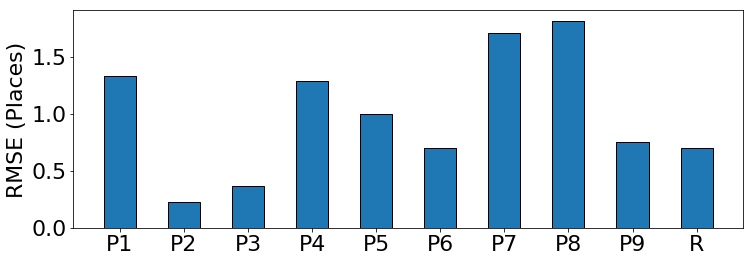

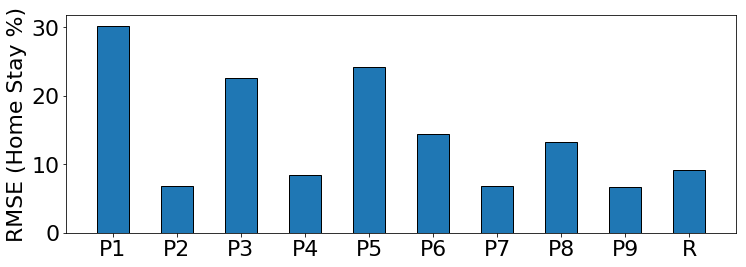

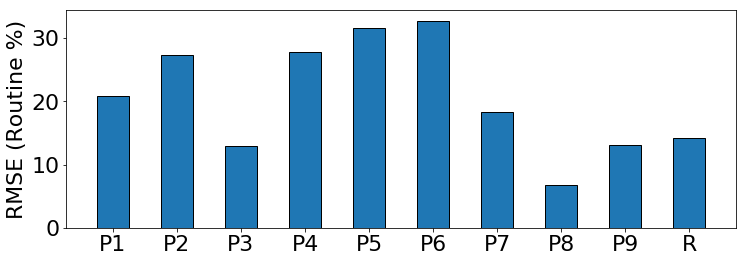

In [251]:
SAVE_FIG = False
rmse_barplot(rmse_places,   'RMSE (Places)',      'rmse_places')
rmse_barplot(rmse_homestay, 'RMSE (Home Stay %)', 'rmse_homestay')
rmse_barplot(rmse_routine,  'RMSE (Routine %)',   'rmse_routine')

In [35]:
me_places, me_homestay, me_routine   =  [], [], []
#max_places, max_homestay, max_routine = [], [], []
#min_places, min_homestay, min_routine = [], [], []

for uid in ids:
    print('%s...' % uid)
    f = get_features(uid)
    a = get_answers(uid)
    assert (len(a) == len(f))
    assert (np.all(a.date.values == f.date.values))
    
    dates = a.date
    
    ans, feat, dat = get_places_data(uid, dates, a, f)
    me_places.append((feat.sum() - ans.sum()) / len(ans))
    #max_places.append((ans - feat).max())
    #min_places.append((ans - feat).min())
    
    ans, feat, dat = get_homestay_data(uid, dates, a, f)
    me_homestay.append(100 * (feat.sum() - ans.sum()) / len(ans))
    #max_homestay.append(100 * (ans - feat).max())
    #min_homestay.append(100 * (ans - feat).min())
    
    ans, feat, dat = get_routine_data(uid, dates, a, f)
    me_routine.append(100 * (feat.sum() - ans.sum()) / len(ans))    
    #max_routine.append(100 * (ans - feat).max())
    #min_routine.append(100 * (ans - feat).min())

1babb9e7-f88b-489a-b82a-4b67e3f58d55...
1be9abef-6967-492a-9b83-46cb08493357...
284a0170-caed-4c29-bfac-757409b9d248...
5ba5e566-409a-4664-a9fa-f27c08422578...
d6962ede-e622-475e-959a-5405af68414b...
d91a3af6-1a81-48a4-a8c2-1eb6022401b6...
dfe18eb9-791b-440d-8e55-61b6886904b2...
ec110976-0192-436d-b451-4f5dd97e71d8...
21e6abea-ebbc-453b-8cff-15064e32db06...
d6b2d9b9-398b-4e0d-b52b-224747f515c8...


In [36]:
np.mean(np.abs(me_places))

0.49762737262737267

In [37]:
np.mean(np.abs(me_homestay))

9.992703961718501

In [38]:
np.mean(np.abs(me_routine))

12.96815708670924

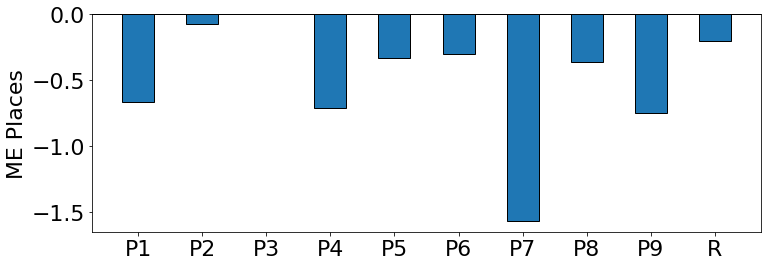

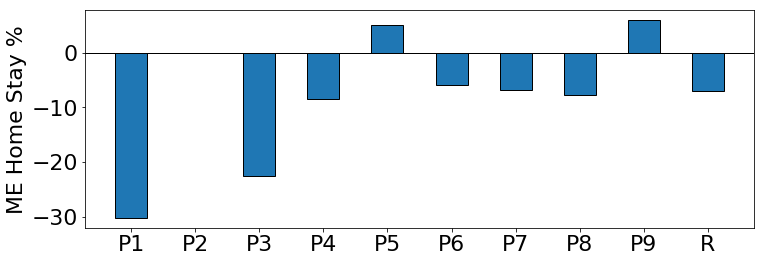

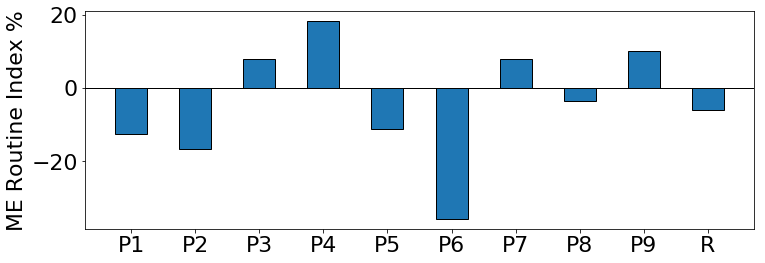

In [63]:
SAVE_FIG = True
rmse_barplot(me_places,   'ME Places', 'me_places')
rmse_barplot(me_homestay, 'ME Home Stay %', 'me_homestay')
rmse_barplot(me_routine,  'ME Routine Index %', 'me_routine')

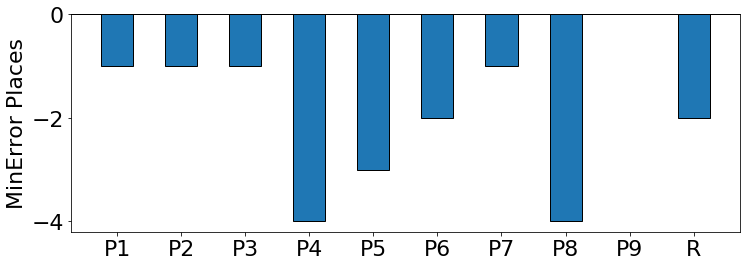

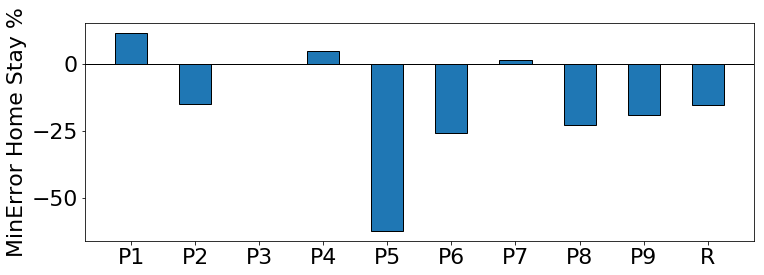

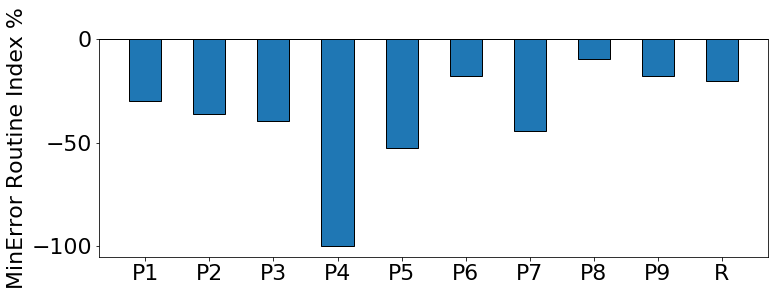

In [254]:
SAVE_FIG = True
rmse_barplot(min_places,   'MinError Places', 'min_places')
rmse_barplot(min_homestay, 'MinError Home Stay %', 'min_homestay')
rmse_barplot(min_routine,  'MinError Routine Index %', 'min_routine')

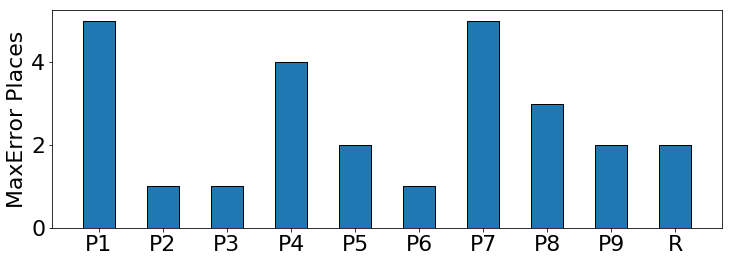

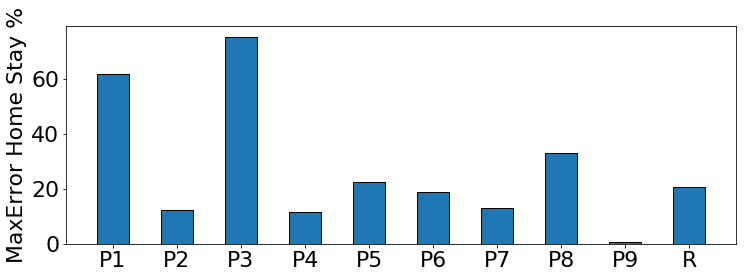

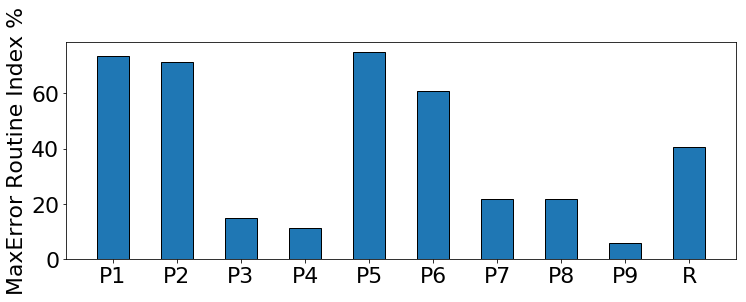

In [255]:
SAVE_FIG = True
rmse_barplot(max_places,   'MaxError Places', 'max_places')
rmse_barplot(max_homestay, 'MaxError Home Stay %', 'max_homestay')
rmse_barplot(max_routine,  'MaxError Routine Index %', 'max_routine')

# TODO
* Use the feature calculation closest to the latest answer on a day
* Use the manual answers from the excel sheet

* Answers are not ground truth...
* Unreliable sensing
    * Turning phone off during the night!?

# Find avg number of stops per day